https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [1]:
#!pip install --upgrade nbformat
#!pip install --upgrade nbconvert


In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn

In [4]:
!pip install -U imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.7 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [5]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [6]:
pd.set_option('display.max_columns', None)


# functions

In [7]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [8]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [11]:
import pandas as pd

# Provide the correct path to the file in your Downloads folder
file_path = '~/Downloads/creditcard.csv'

# Load the CSV file
creditcard_df = pd.read_csv(file_path)

# Display the first few rows to confirm it is loaded correctly
creditcard_df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

# EDA

In [12]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [13]:
creditcard_df.shape

(284807, 31)

In [14]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
238378  149645.0 -2.378157  1.306607 -0.086189 -0.568703 -0.179801  0.198590   
170373  120149.0  1.918771 -0.306208 -1.671600  0.070766  1.132986  1.422268   
62075    50114.0 -2.031731 -0.494609  2.712806 -0.421355  0.212689  1.421677   
78175    57401.0 -1.650064  0.494759  2.398375  0.728448 -0.832896  0.546435   
91679    63579.0  1.056353  0.103672  1.601485  2.659473 -0.955789  0.332185   

              V7        V8        V9       V10       V11       V12       V13  \
238378 -0.486831  1.063943  0.243253 -0.505410 -1.609891  0.800559  1.778618   
170373 -0.173331  0.379771  0.351394  0.111488  0.813595  1.012208 -0.196759   
62075   0.759964 -1.304558  1.273726  0.401110  1.354679  0.276975 -1.296761   
78175   0.310703  0.542568  0.973022 -0.971587 -1.407545 -0.294283 -2.449485   
91679  -0.733361  0.368842  0.026001  0.696194  0.712171  0.255455 -1.334034   

             V14       V15       V16       V17       V18       V19       V20  \
238378  0.125475  0.910778  0.424916 -0.486526  0.561186  0.227040 -0.072726   
170373  0.520105 -0.058213 -0.709202  0.101990 -1.412614 -0.359278 -0.257694   
62075  -1.228086 -0.798844 -0.584202 -0.208317 -0.863157 -0.607603 -0.515357   
78175  -0.452005 -2.045793 -0.931502  0.821430 -1.114557 -0.395259 -0.552683   
91679   0.045040 -0.880076  0.817563 -0.520224  0.383637 -0.622652 -0.227308   

             V21       V22       V23       V24       V25       V26       V27  \
238378  0.237684  0.805146 -0.061231  0.080584  0.280876 -0.174845 -0.382961   
170373 -0.156095 -0.276349  0.289306 -0.946087 -0.299341  0.175870 -0.022878   
62075   0.401131 -0.214762 -0.268078 -0.254541 -0.028416  0.189729 -1.169352   
78175  -0.404457 -0.735841  0.101540  0.342047  0.364580 -0.644060 -0.368609   
91679  -0.032263 -0.050345  0.068416  0.503108  0.195960 -0.070124  0.030045   

             V28  Amount  Class  
238378 -0.180572    1.18      0  
170373 -0.079622   15.00      0  
62075  -0.328439  147.03      0  
78175  -0.266440   79.90      0  
91679   0.025988    6.08      0

In [15]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [16]:
sset = ['Amount', 'Class']

In [17]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

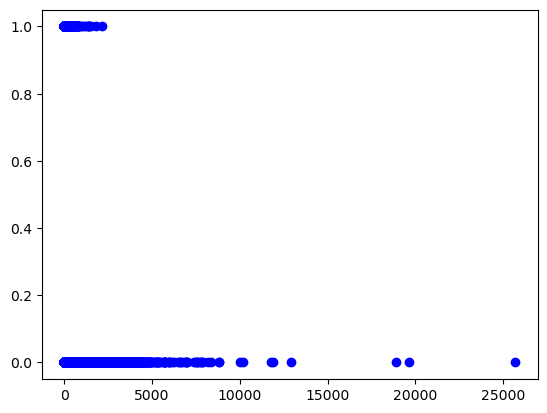

In [18]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

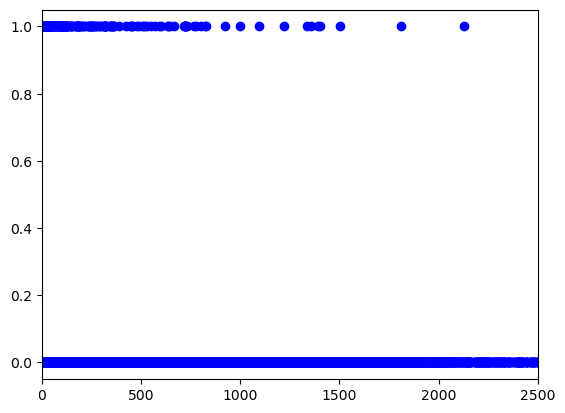

In [19]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

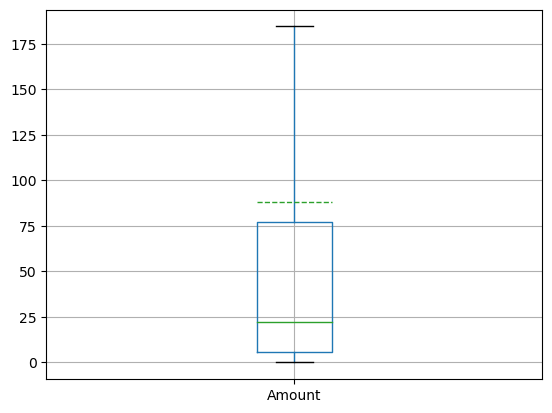

In [20]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


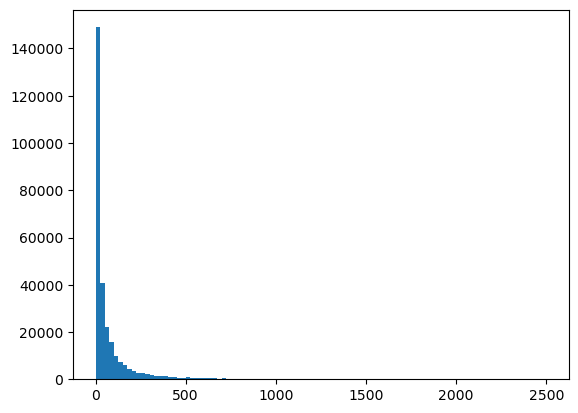

In [21]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

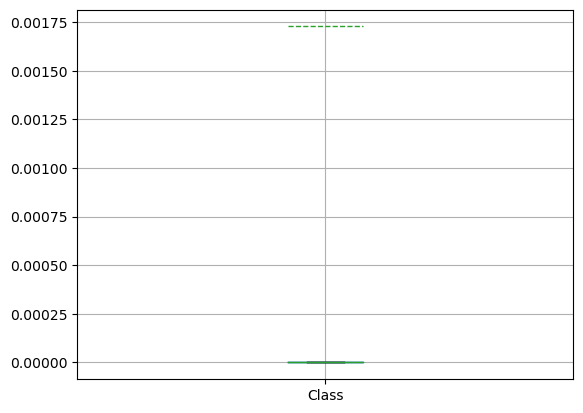

In [22]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

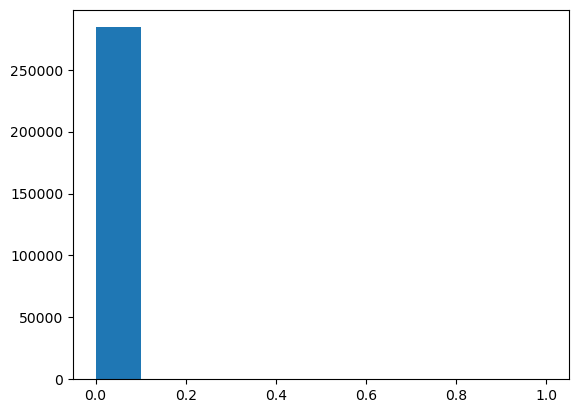

In [23]:
plt.hist(creditcard_df['Class'])
plt.show()

In [24]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

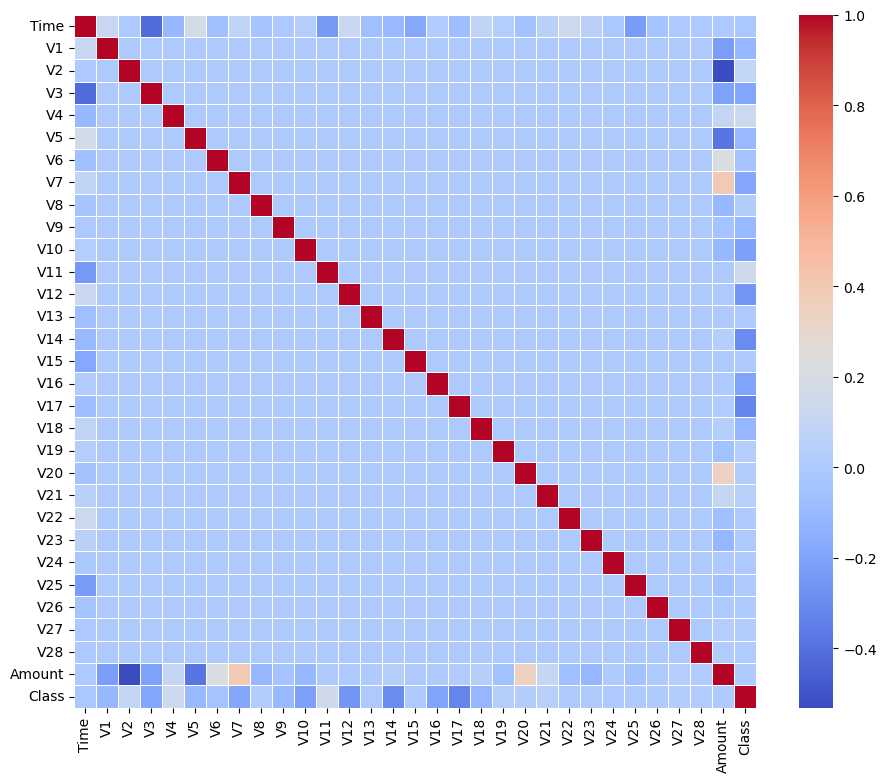

In [25]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

We have grouped the data set into class and other variables as V1 , V2 ....., Amount

In [26]:
grouped_class_df = creditcard_df.groupby('Class')

In [27]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [28]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [29]:
grouped_class1_df = grouped_class_df.get_group(1)

In [30]:
grouped_class1_df.sample(3)

Time         V1        V2         V3        V4         V5  \
42936    41305.0 -12.980943  6.720508 -13.455636  8.698610 -11.479552   
218442  141320.0  -6.352337 -2.370335  -4.875397  2.335045  -0.809555   
42700    41204.0  -8.440284  6.147653 -11.683706  6.702780  -8.155839   

              V6         V7        V8        V9        V10       V11  \
42936  -2.681519 -14.019291  8.218191 -7.930900 -12.695947  5.589362   
218442 -0.413647  -4.082308  2.239089 -1.986360  -5.165331  2.942939   
42700  -3.716264 -12.407313  5.626571 -6.232161 -13.386683  7.605559   

              V12       V13        V14       V15        V16        V17  \
42936  -11.960866  1.538671  -9.887214  0.633979 -11.350244 -21.710188   
218442  -4.125722 -0.433094  -3.518131  0.420777  -5.104480  -7.925389   
42700  -13.351815  0.827050 -14.979477  1.532813 -11.771497 -20.299217   

             V18       V19       V20       V21       V22       V23       V24  \
42936  -8.859452  3.629714 -0.843303  2.549628 -0.532228 -0.235096  0.673209   
218442 -3.415707  0.718332  0.186898  1.325218  1.226745 -1.485217 -1.470732   
42700  -7.609110  3.809136  0.520732  2.192855 -0.282597  0.008068  0.403858   

             V25       V26       V27       V28  Amount  Class  
42936   0.226598 -0.006168 -1.185696 -0.747361   59.68      1  
218442 -0.240053  0.112972  0.910591 -0.650944  195.66      1  
42700  -0.018788  0.522722  0.792691  0.067790   30.26      1

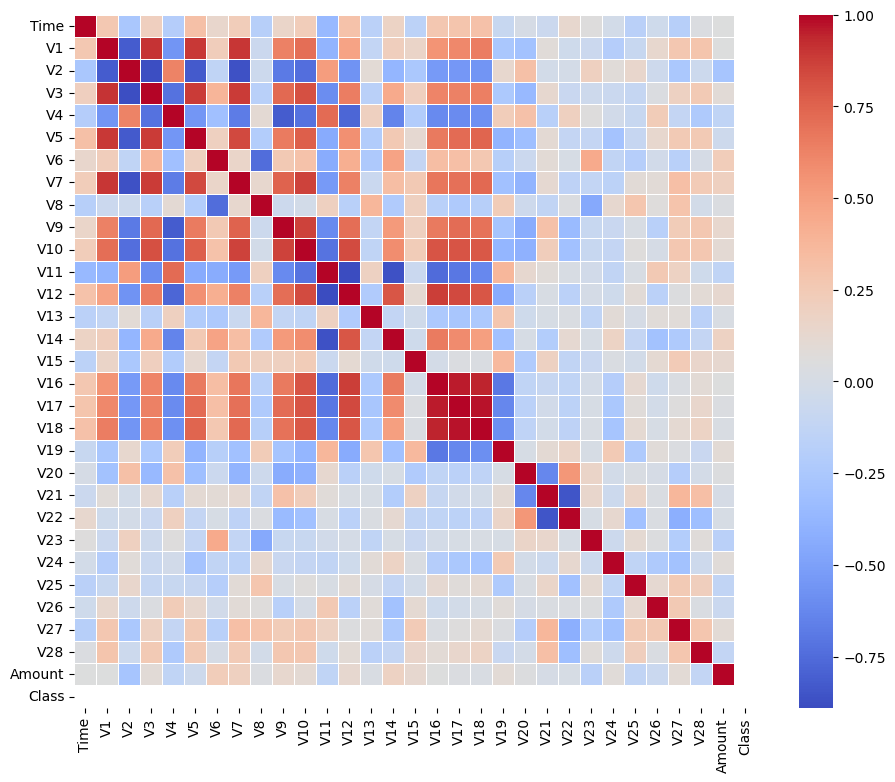

In [31]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [32]:
grouped_class0_df = grouped_class_df.get_group(0)

In [33]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
63748    50853.0  1.237170 -0.002549 -1.333699 -0.033559  2.225664  3.303038   
245833  152929.0  2.229772 -1.494834 -0.426227 -1.658388 -1.502465 -0.243587   
33871    37418.0 -0.260161  0.619570  0.998167  0.132733  0.408616 -0.433400   
273464  165595.0  2.062023 -0.243738 -0.751177  0.049240 -0.046007  0.016141   
134783   80962.0 -0.176724  1.346604 -0.229349  0.789382  0.240206 -0.683741   

              V7        V8        V9       V10       V11       V12       V13  \
63748  -0.317452  0.755946 -0.157150  0.059549 -0.161552  0.030006 -0.017250   
245833 -1.487802  0.043485 -1.184934  1.683736  0.487813 -0.153540  0.338345   
33871   1.310075 -0.315669 -0.911214  0.036431  1.106591  0.308351 -0.226503   
273464 -0.484934  0.013017  1.295313 -0.244890 -1.330987  0.455353  0.690597   
134783  0.536968  0.337014 -0.905228  0.156777  0.693351  0.608147 -0.171916   

             V14       V15       V16       V17       V18       V19       V20  \
63748   0.532484  1.108363  0.378094 -0.926162  0.296431 -0.008946  0.047537   
245833 -0.386988 -0.550572 -0.008772  0.075418  0.357124  0.199324 -0.424565   
33871   0.464207  0.240135 -0.111868 -0.478214  0.020464  1.314170  0.297340   
273464 -0.076351  1.114242  0.445878 -0.979286  0.236629  0.144497 -0.162868   
134783  1.022686 -0.030319 -0.134668 -0.337748  0.540695  0.792080 -0.052318   

             V21       V22       V23       V24       V25       V26       V27  \
63748  -0.005798 -0.192895 -0.163701  1.005673  0.835917 -0.316304  0.010160   
245833 -0.368478 -0.619809  0.420222 -0.470082 -0.617416 -0.477476  0.035710   
33871  -0.228013 -0.708948  0.186177 -0.013149 -0.644150  0.104616 -0.102217   
273464 -0.168561 -0.358346  0.291581 -0.016272 -0.233004 -0.915362  0.056425   
134783  0.204480  0.636353  0.019005  0.013406 -0.679649 -0.409602  0.308900   

             V28  Amount  Class  
63748   0.019210   36.77      0  
245833 -0.048652   16.40      0  
33871  -0.077180   84.95      0  
273464 -0.026499    1.00      0  
134783  0.154587    3.99      0

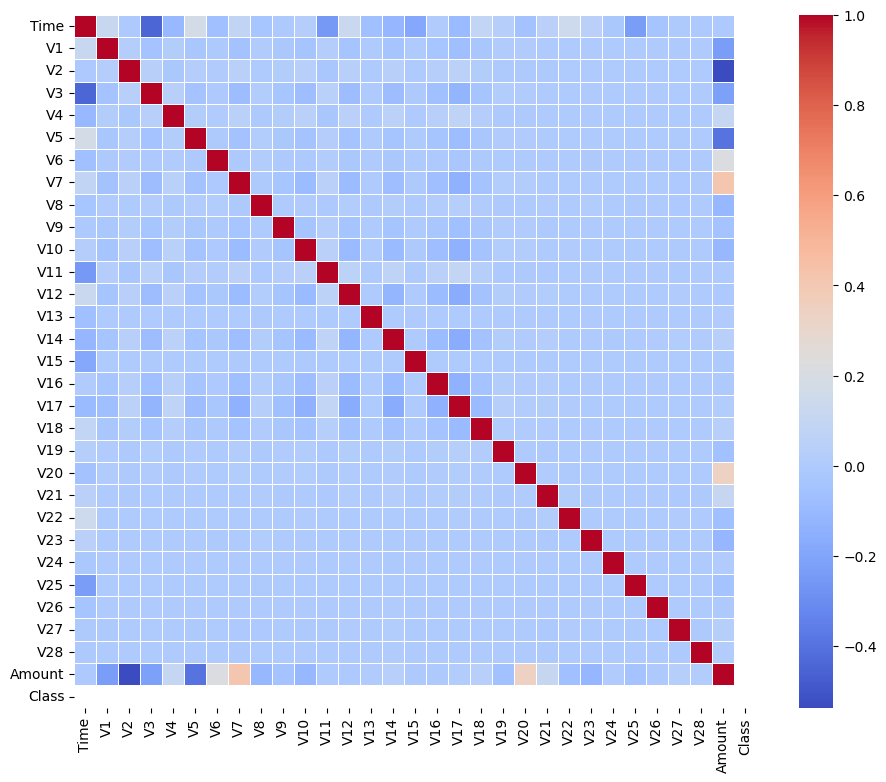

In [34]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

Again we have grouped the dataset into amount and other variables like V1, V2 .... and amount which is additional work in our analysis

After grouping pair plotting has been performed to have better visualisation of the data

In [35]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [36]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
21496    31705.0  1.114412 -0.161962  0.735548  0.057714 -0.834656 -0.743004   
59111    48699.0  1.128120  0.165296  0.217783  1.103735 -0.160325 -0.494607   
23043    32558.0 -0.459740  0.909697  1.948541  0.970911 -0.180586  0.142637   
134014   80607.0 -0.164552  1.026708  1.526993  0.482985  0.407417 -0.776998   
271403  164560.0 -3.882926  4.136529 -2.711647 -0.239686 -1.070668  0.180029   

              V7        V8        V9       V10       V11       V12       V13  \
21496  -0.205292 -0.050365 -0.027248 -0.029411  1.747083  1.218928  0.459618   
59111   0.160792 -0.079566  0.040937 -0.033745 -0.246017  0.041750 -0.454783   
23043   0.318764  0.081920  0.025727 -0.294434 -1.017678  0.713792  1.449643   
134014  1.169221 -0.448785 -0.630317 -0.247627 -0.234508  0.495529  1.231094   
271403 -3.959806 -6.199844 -0.922319 -2.708704 -1.377681  1.694865  0.284400   

             V14       V15       V16       V17       V18       V19       V20  \
21496   0.269227  0.486053  0.619937 -0.597333 -0.132776  0.200123  0.071507   
59111   0.513464  1.224392 -0.218187 -0.121281 -0.539325 -0.738318 -0.127227   
23043  -0.655012  0.062322 -0.440849 -0.145062  0.204102  0.681797  0.278699   
134014 -0.197086  0.593045 -0.183202 -0.593862 -0.172484 -0.236010  0.087553   
271403  0.269416 -1.292882  0.868256  2.217483  0.350230 -0.936357  1.930201   

             V21       V22       V23       V24       V25       V26       V27  \
21496  -0.145830 -0.574786  0.141112  0.587479 -0.060811  0.706715 -0.077607   
59111   0.072897  0.185343 -0.097304  0.076416  0.586073 -0.301267  0.020243   
23043   0.153067  0.848913 -0.274268  0.106226  0.063037 -0.152807  0.442395   
134014  0.068764  0.425577 -0.278499  0.420626  0.272717 -0.401444 -0.118888   
271403 -3.636765  1.620286  0.505273 -0.127981 -0.155519  0.550767  0.095305   

             V28  Amount  Class Amount_Group  
21496   0.015402   55.00      0       0-2500  
59111   0.022567   42.00      0       0-2500  
23043   0.213271   21.39      0       0-2500  
134014 -0.193527   13.90      0       0-2500  
271403  0.313328    0.95      0       0-2500

In [37]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [38]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [39]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [40]:
col = grouped_amountlow_df.columns

In [41]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [42]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [43]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [44]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

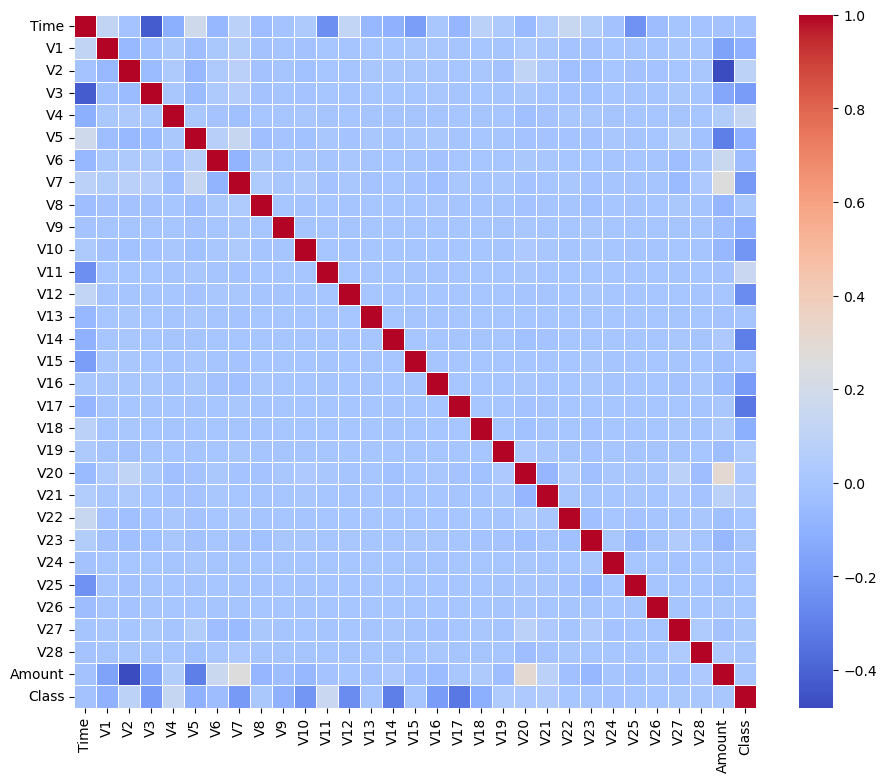

In [45]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


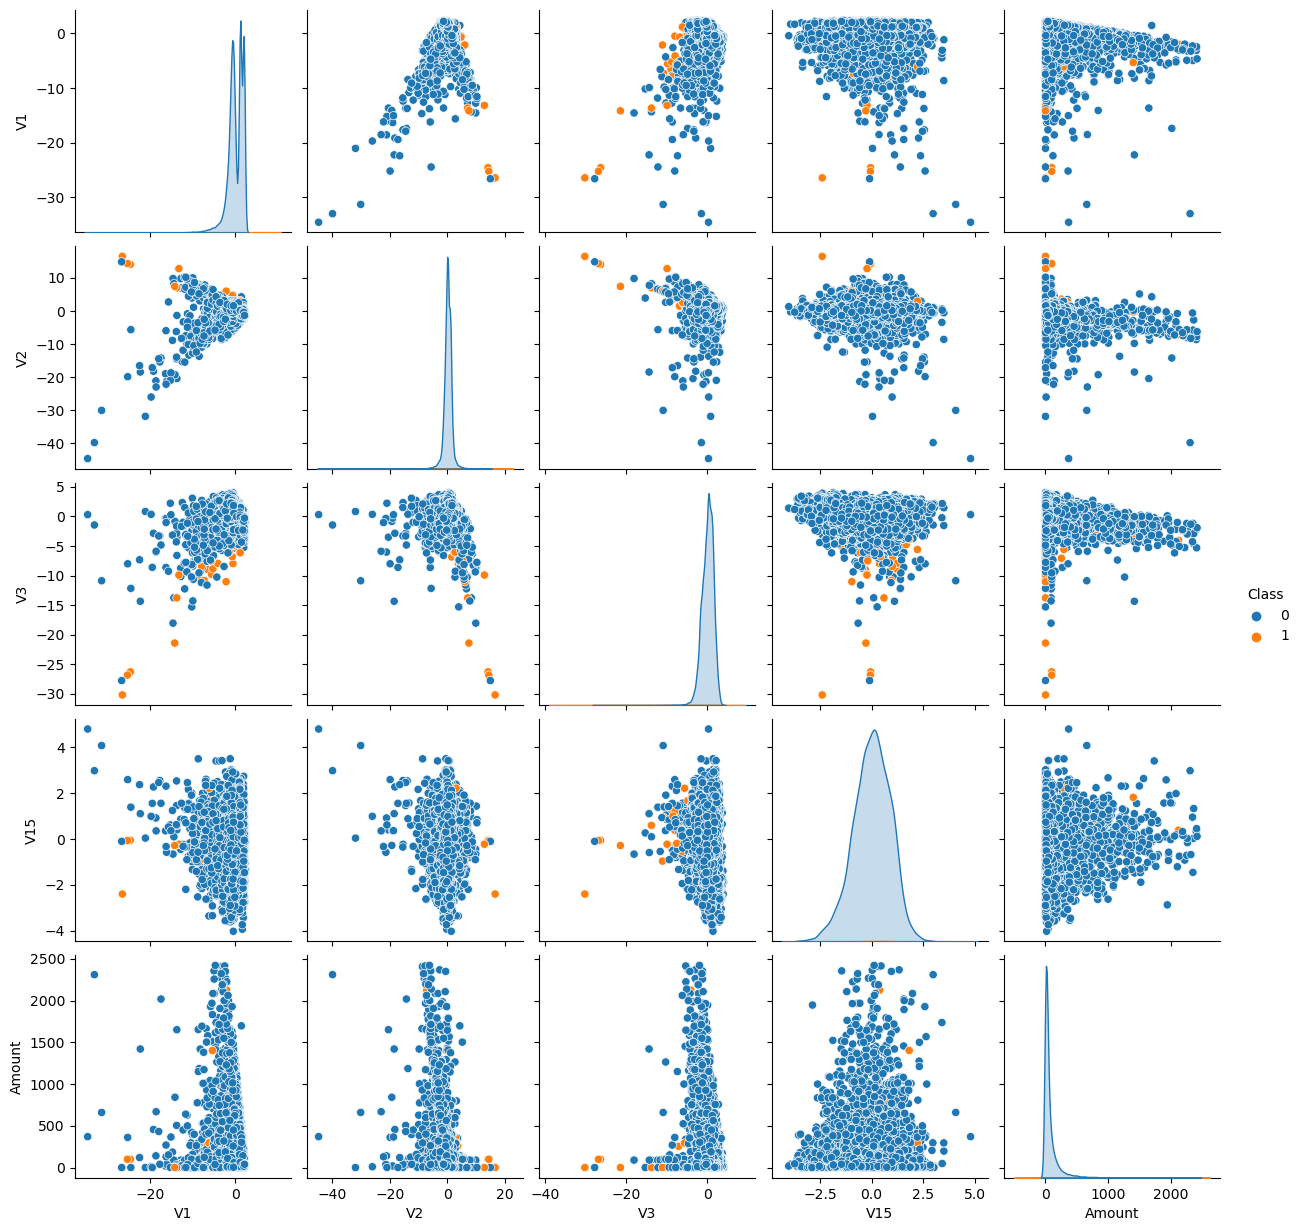

In [46]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


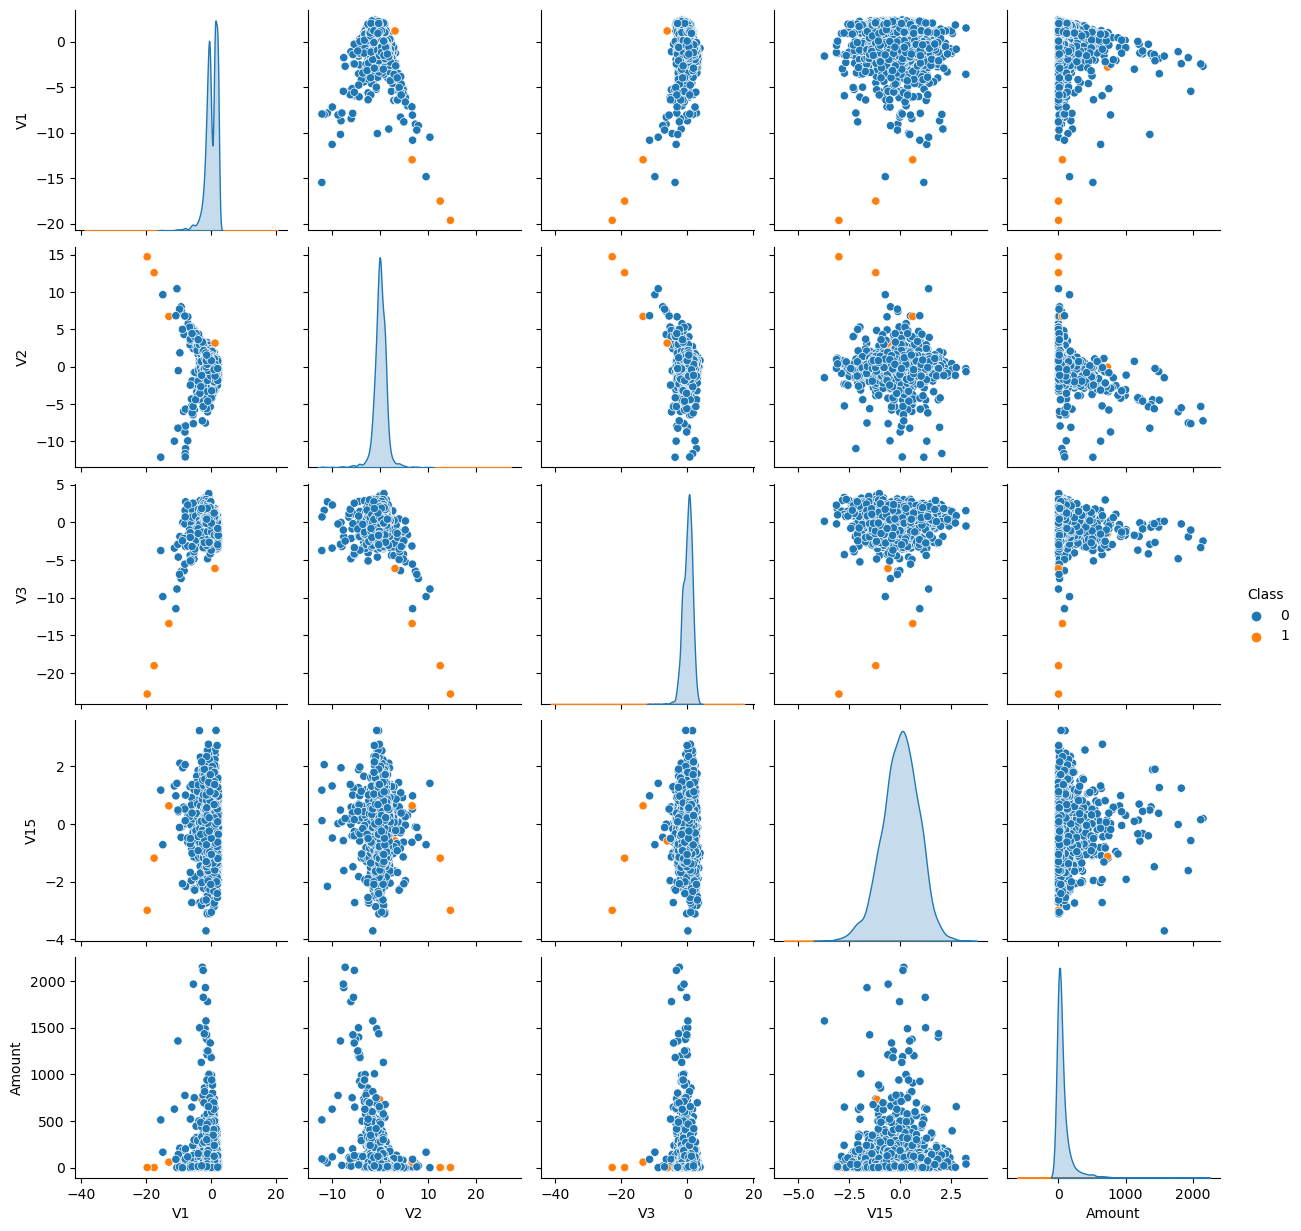

In [47]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [48]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


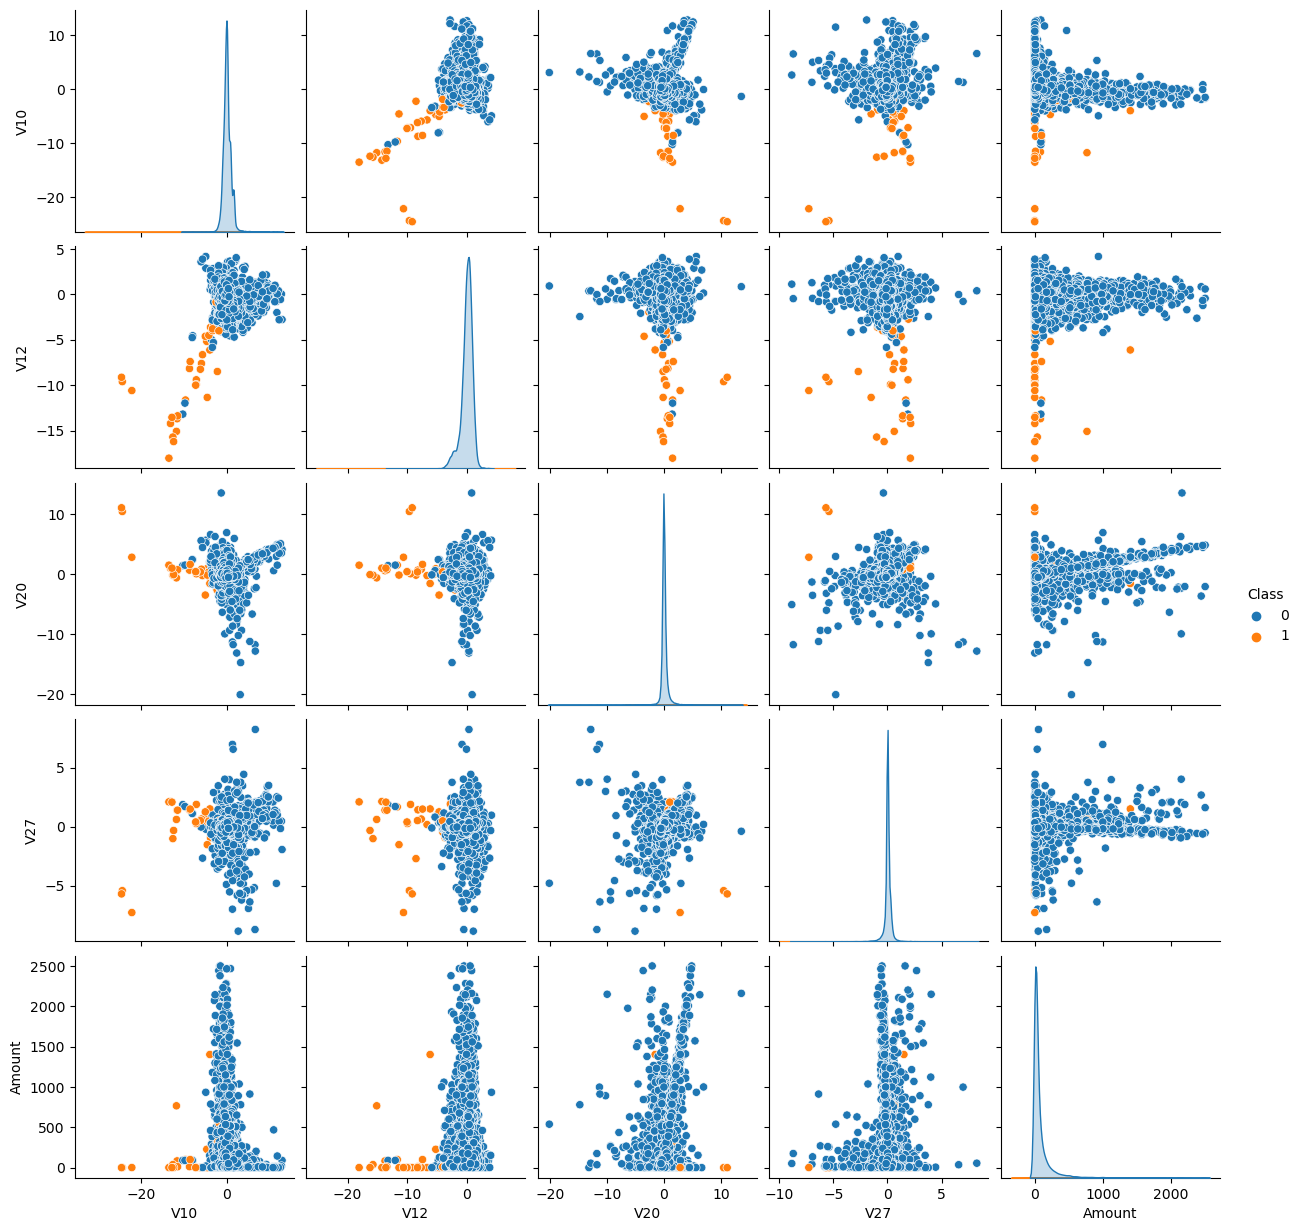

In [49]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [50]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']


In [51]:
#sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
#plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


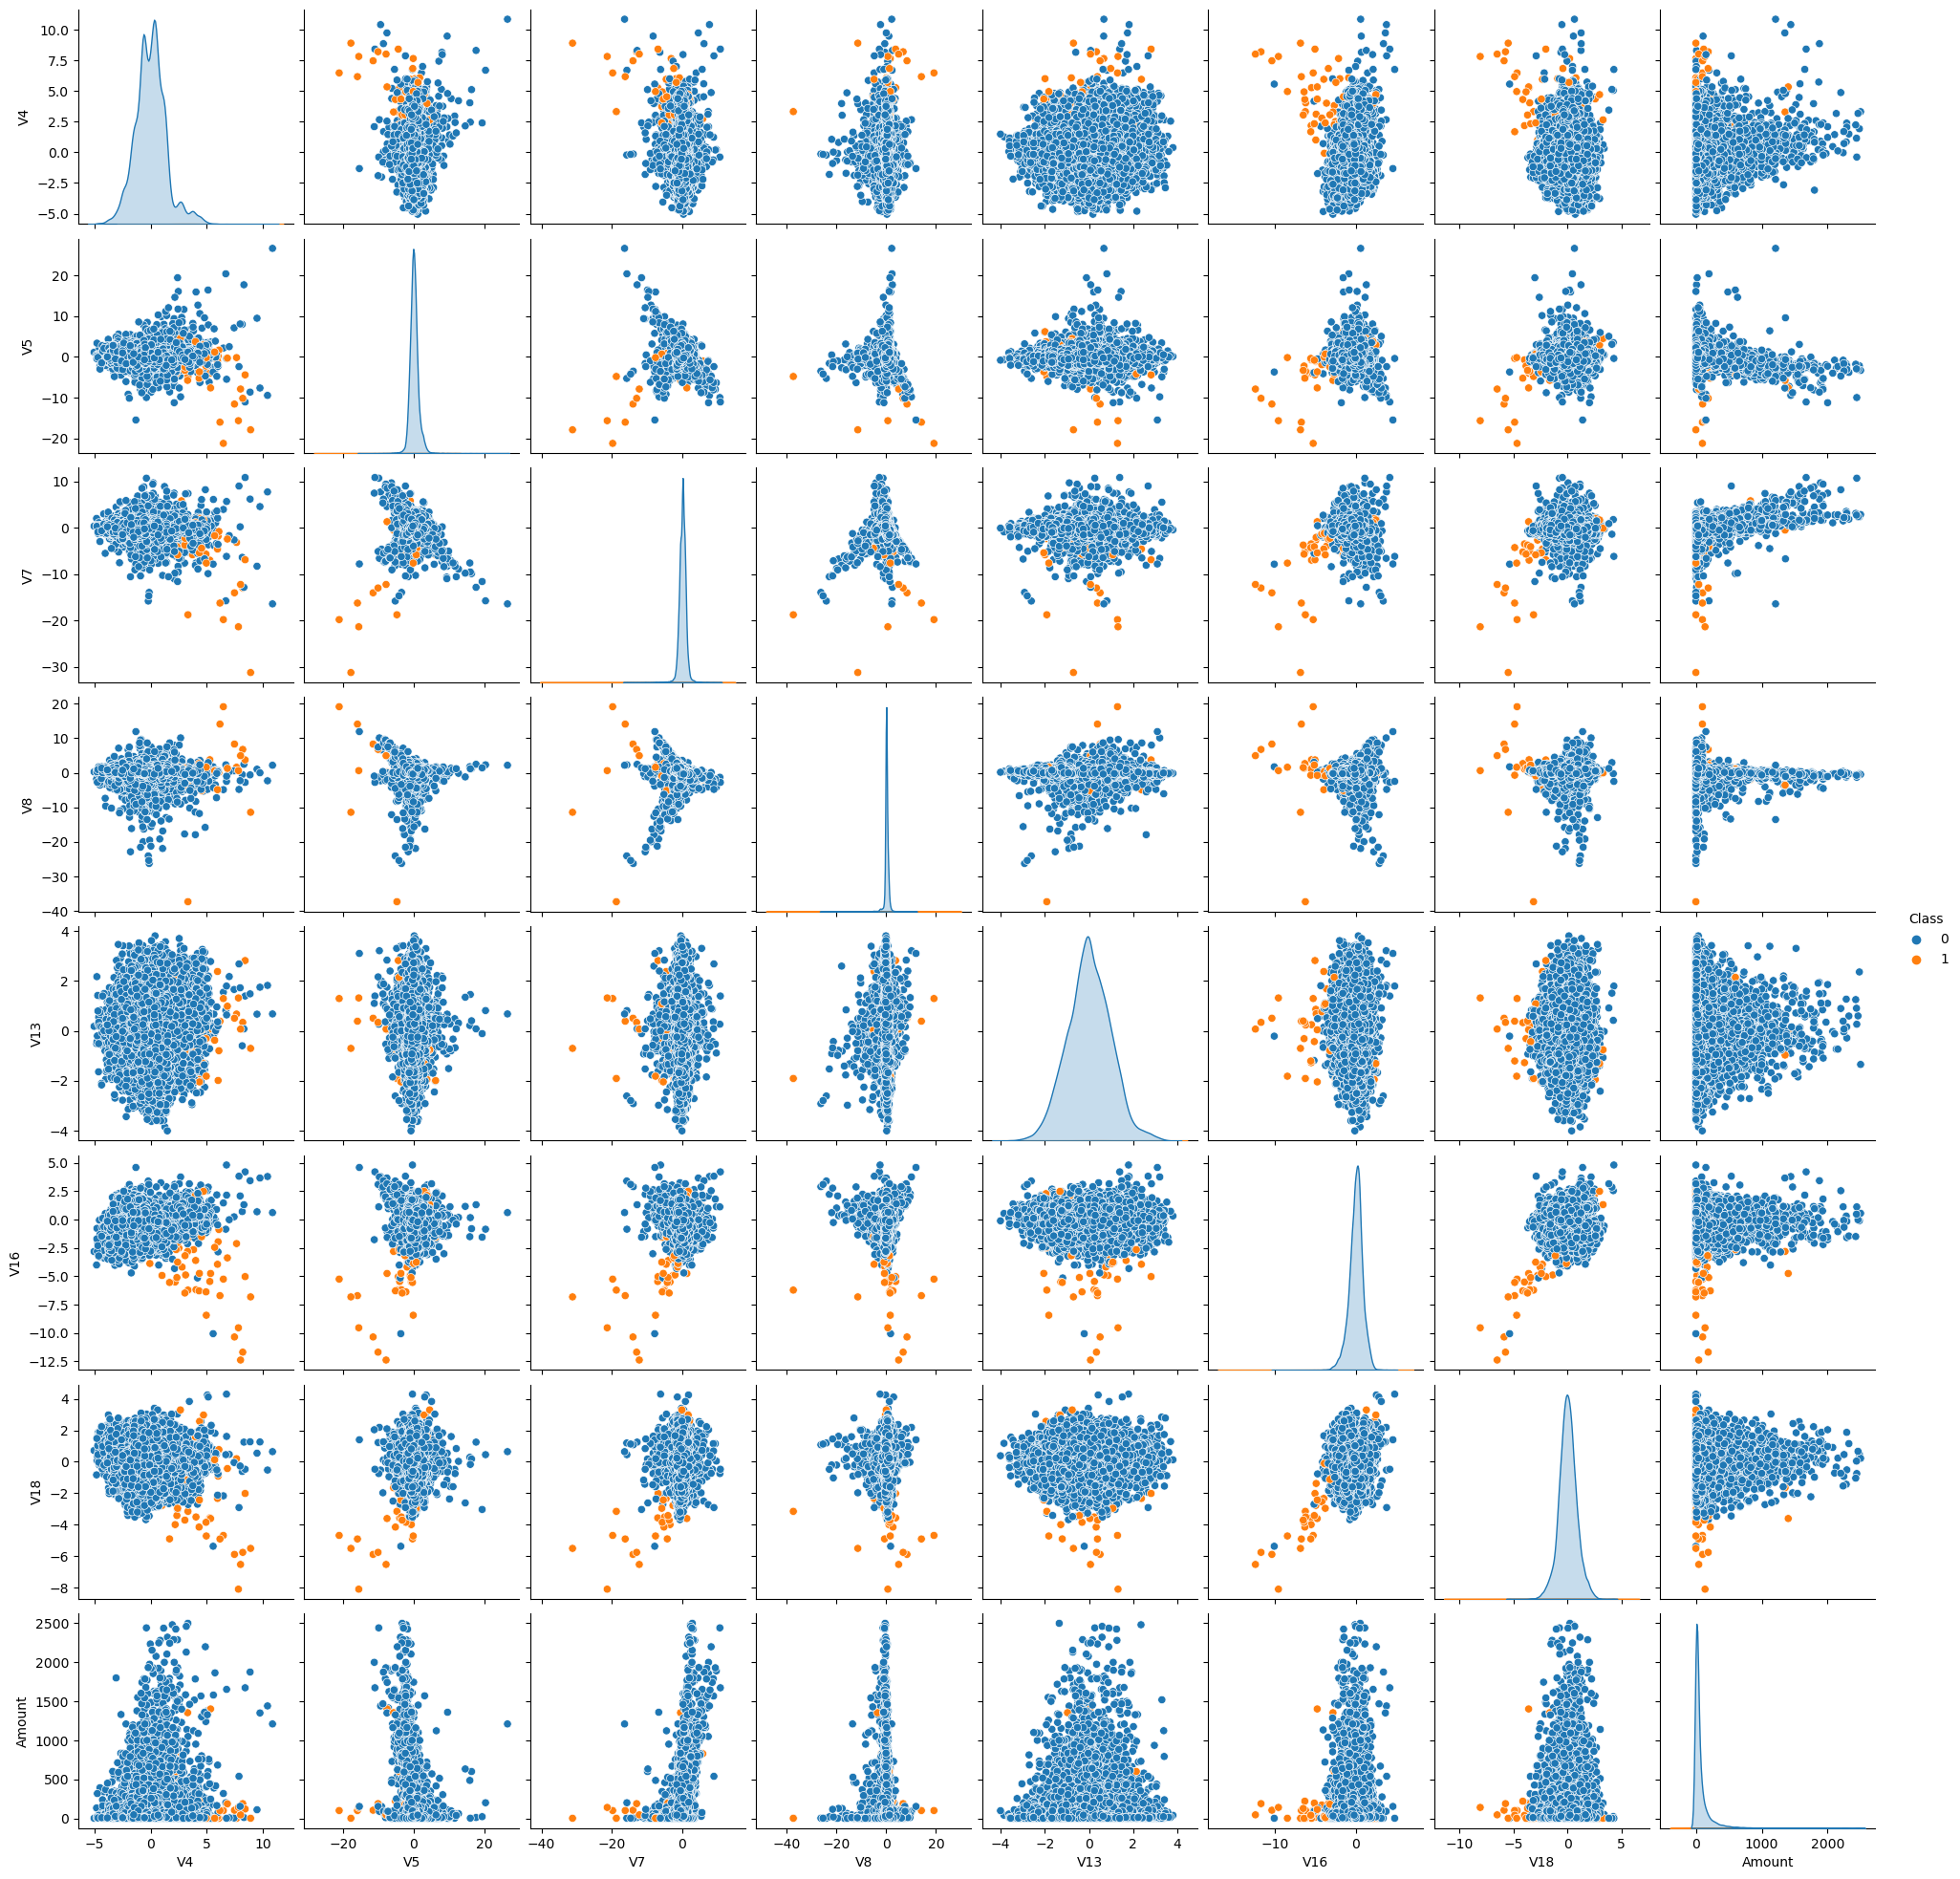

In [52]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

/Users/ranaibrahimli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


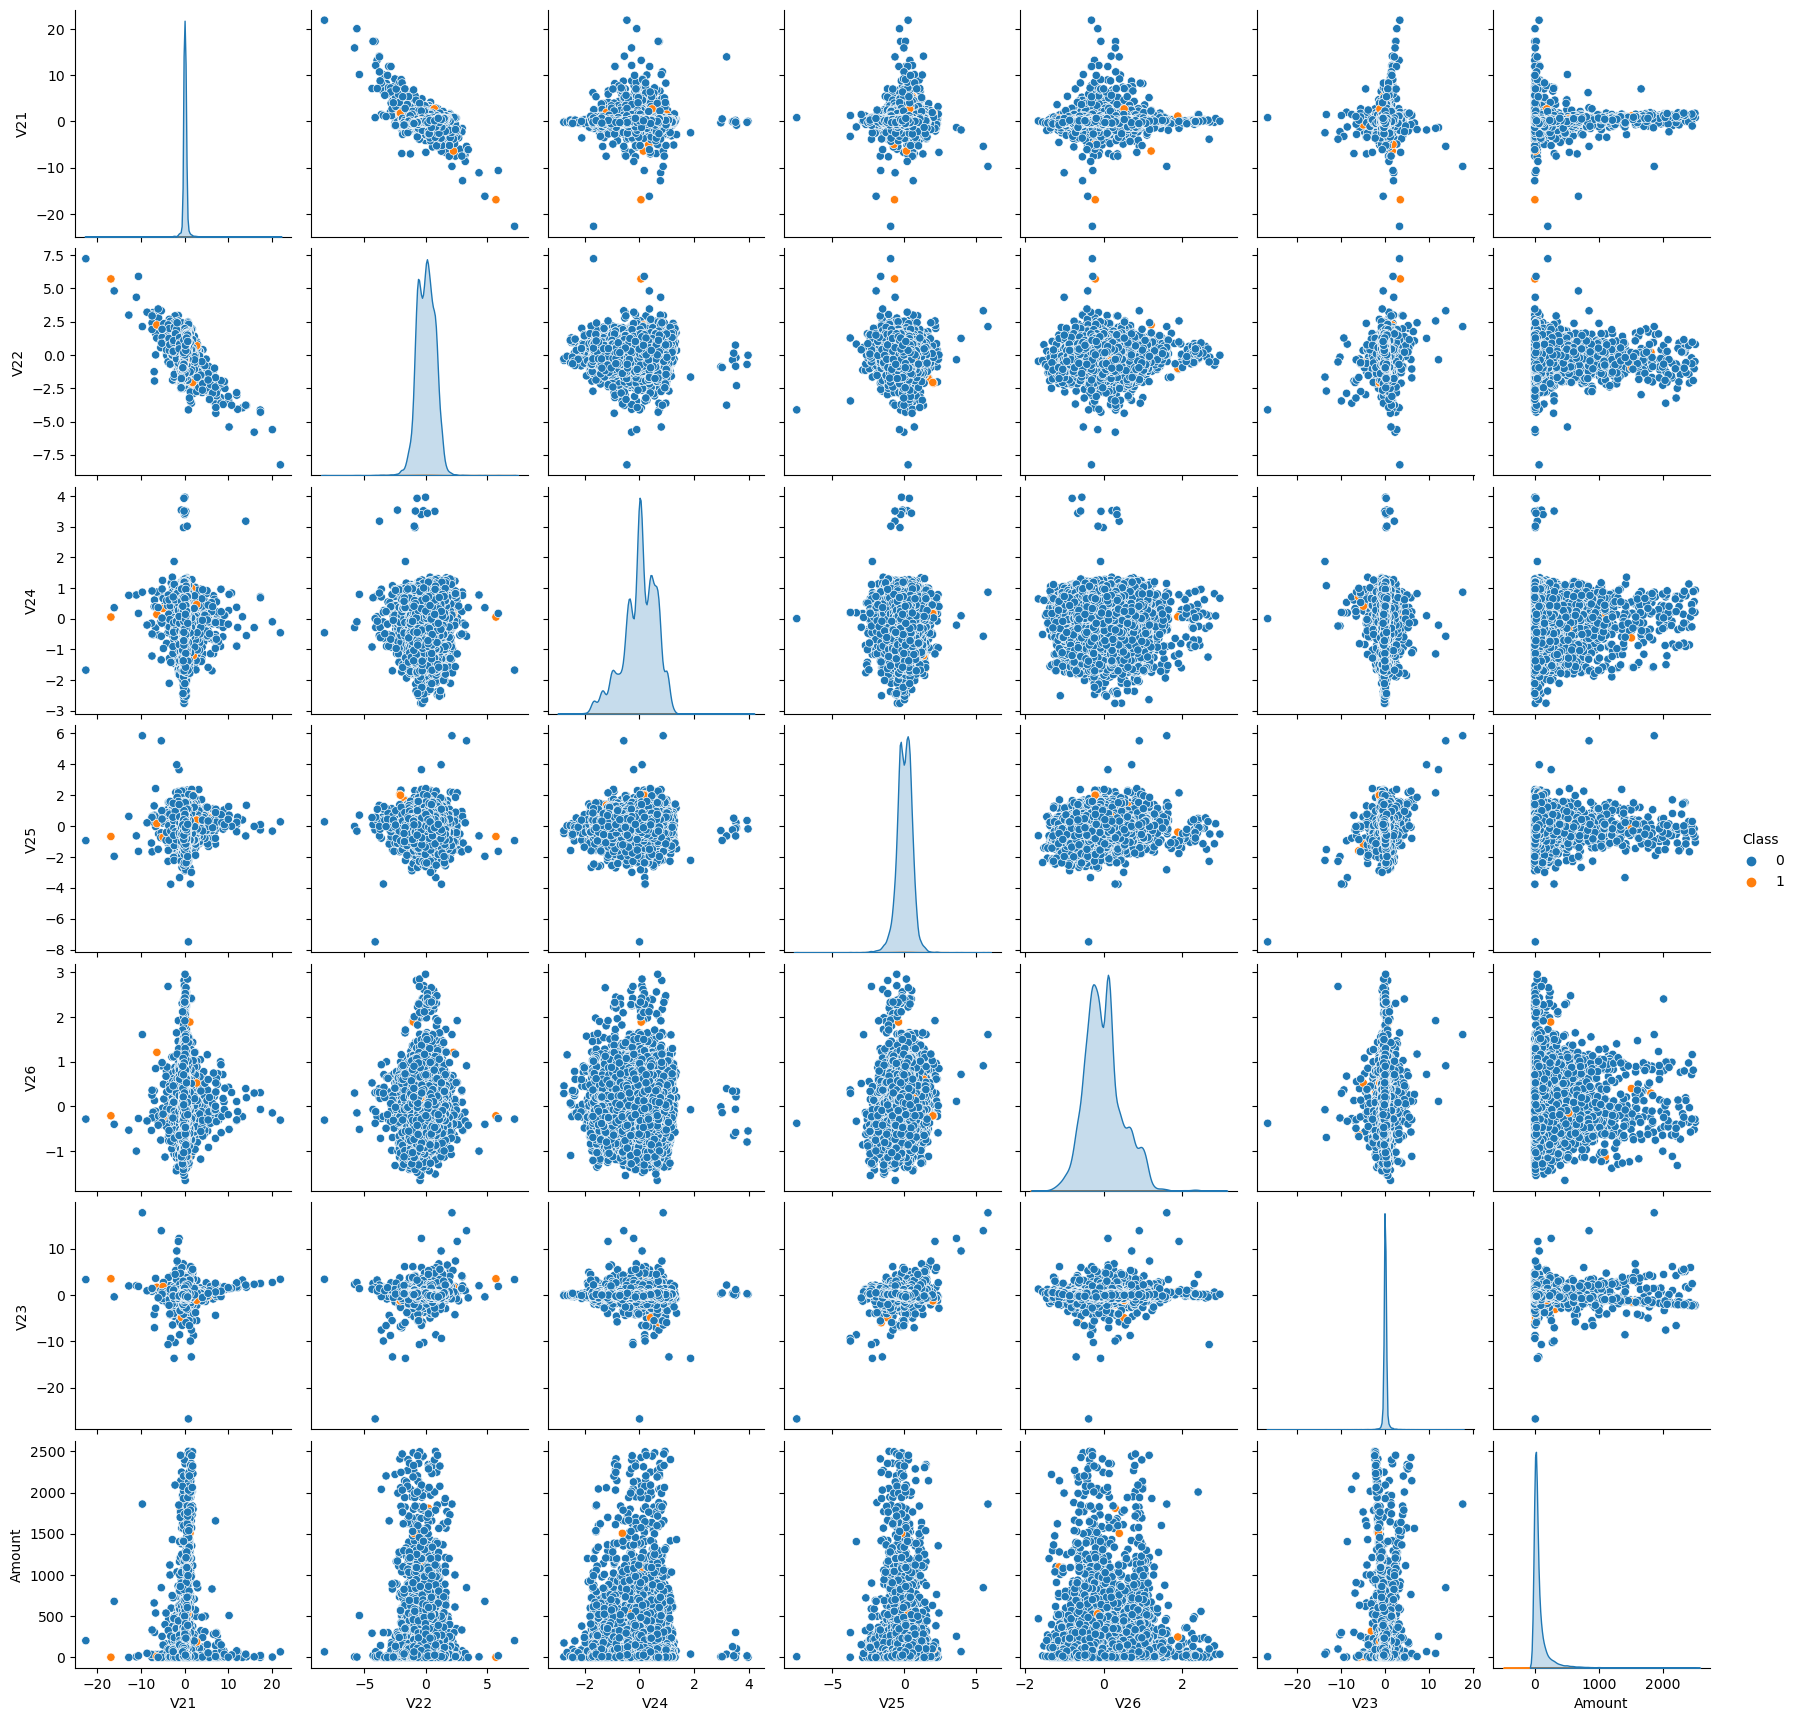

In [53]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

 #after pairs plotting we can identify there are some outliers which are fraud

In [54]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

*two group*

In [55]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [56]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [57]:
grouped_amount_class_df.sample(3)

Time         V1         V2         V3        V4         V5  \
193503  130163.0  -1.569102  -1.201105   0.118974 -3.875529   1.377396   
173257  121408.0  -1.306381   1.981802  -1.733439 -0.081926  -0.190282   
206950  136455.0  -4.285815  -3.112576  -0.621203 -1.120386   1.756925   
108258   70828.0   0.196707   1.189757   0.704882  2.891388   0.045555   
64411    51135.0 -10.527304   7.639745 -13.443115  4.303403  -8.048210   
219892  141925.0   0.120301   1.974141  -0.434087  5.390793   1.289684   
67051    52344.0 -10.296682 -12.260757  -0.656765  5.203554  -1.304961   
33480    37251.0  -4.446793  -5.898649  -2.286578  1.900677  -6.778581   
100954   67676.0  -7.103082  -1.706830  -9.726332  1.657590 -31.356750   

               V6         V7        V8        V9       V10       V11  \
193503   3.686539  -1.373555  1.600599 -2.183831  0.287784 -0.552107   
173257  -1.521326  -0.077691  0.961763 -0.343394 -1.050881 -0.755944   
206950  -0.132096  -0.983309  1.213847 -1.547274 -0.799055  0.205892   
108258   1.245730  -1.198714 -2.421616 -1.232089  0.324239 -1.273935   
64411   -3.466997  -8.643193  7.284105 -2.362097 -5.996596  2.589104   
219892   0.280590   0.221963  0.067827 -1.387054 -0.045125  0.195839   
67051    2.549048   3.379719 -1.969373  2.132240  0.652491  1.078206   
33480    3.696591   9.585926 -0.761987 -1.822145 -2.535037  0.877894   
100954  20.379524  29.205868 -5.498667 -1.369680 -3.713841  2.212401   

             V12       V13       V14       V15       V16       V17       V18  \
193503 -0.939514  0.269540 -0.267439 -0.088200  0.009956  0.240625 -0.041577   
173257  0.658186  0.894460 -0.130449  0.567534  0.270199  0.942912  0.600901   
206950  0.753416  0.187318  1.172781  0.135240 -1.854223  0.340801  1.054129   
108258 -0.868686 -1.181945  1.027584  1.688132  0.256216  0.120608 -0.052346   
64411  -5.962261 -0.468955 -6.778184  0.907947 -3.970130 -6.857613 -2.511736   
219892 -0.629086  0.681222 -4.715521 -0.287876  0.497434  3.871618  1.492394   
67051   0.671179  0.058861 -2.119206 -1.319558  1.237779 -0.698595 -0.857746   
33480  -0.362085 -0.246916  0.896077  0.212841  0.878287 -0.920781  1.153716   
100954 -1.534510  0.816452 -1.187157  0.949474  4.594817 -1.560379 -0.739444   

             V19       V20       V21       V22       V23       V24       V25  \
193503 -0.911886  0.110067 -0.266490 -0.928156  0.080211  0.626541  0.423836   
173257 -0.320658 -0.131293  0.393707  1.020148 -0.088342 -0.059403 -0.218689   
206950 -2.094383 -0.081400  0.362154  0.323636 -1.100451 -1.567147  0.891523   
108258  0.329827  0.646616 -1.328132  0.189311 -0.005524 -0.814708  0.400924   
64411   0.511762  0.847085  0.937416 -0.931178 -0.235697 -0.031393  0.591558   
219892  0.506040  0.205691 -0.038690  0.204554 -0.167313  0.791547 -0.223675   
67051  -0.988358 -5.391791 -1.858714  1.047670 -3.126117  0.462187 -1.301160   
33480  -0.160796  5.446901  1.117547 -1.415999  6.003923 -0.399041  0.856564   
100954 -2.004658 -8.817441 -2.719498  0.876382 -2.041865  0.603670  0.321988   

             V26       V27       V28   Amount  Class Amount_Group  
193503 -0.371484  0.174371 -0.045039    88.00      0       0-2500  
173257 -0.143439 -0.003775  0.035718     2.93      0       0-2500  
206950 -0.254461 -0.220231 -0.623393    75.30      0       0-2500  
108258  0.286281  0.135215  0.257315     0.76      1       0-2500  
64411  -0.263516  1.108897  0.219021    99.99      1       0-2500  
219892  0.473223 -0.160202  0.065039     0.76      1       0-2500  
67051   0.174176  3.849932 -2.415507  2660.94      0   2500-above  
33480  -0.968758 -0.854114  0.204805  2543.00      0   2500-above  
100954  1.268208  5.868242 -4.071666  6239.54      0   2500-above

In [58]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [59]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

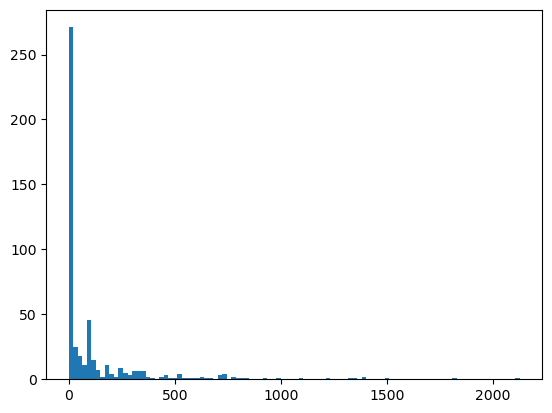

In [60]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

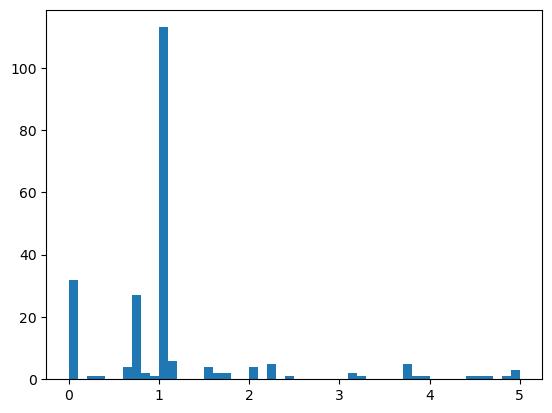

In [61]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [62]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [63]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [64]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
80026    58302.0 -0.349947  0.872881  1.350416  0.964087  0.522109  0.312961   
209926  137773.0 -4.348928 -5.560197  1.743773 -1.323888  4.951870 -2.657905   
164020  116398.0  2.103939  0.055920 -2.196464 -0.150063  0.682917 -1.124706   
206607  136279.0  1.790707 -1.074876 -0.684746 -0.613255 -0.933710 -0.467003   
182763  125538.0  1.973607  0.068148 -0.639258  0.751228 -0.351498 -0.874338   

              V7        V8        V9       V10       V11       V12       V13  \
80026   0.444433  0.181287 -0.961075  0.024779  1.118663  0.516544  0.078661   
209926 -3.582908  0.723990 -0.827931  0.175359  0.084615  0.009138  0.754055   
164020  0.619552 -0.353173  0.006505  0.200093  1.002514  0.645366 -0.683963   
206607 -0.628724  0.033294  1.301830 -0.112322  0.572548  0.488477 -0.672043   
182763 -0.303657 -0.182169  0.753790 -0.514878 -0.169539  1.042846  1.676425   

             V14       V15       V16       V17       V18       V19       V20  \
80026   0.504127  0.800050 -0.346075 -0.203846  0.381979  0.696998  0.069810   
209926 -0.320573 -0.413494  1.805133 -0.667183 -0.037843  0.291530  1.627599   
164020  1.100349 -0.232204 -0.409202 -0.483763  0.031743  0.396950 -0.244816   
206607  0.288122  0.519319  0.694738 -0.844321  0.745708  0.359553  0.052494   
182763 -1.644834  0.454669  0.740517  0.313492 -0.019736 -0.366591 -0.061687   

             V21       V22       V23       V24       V25       V26       V27  \
80026   0.259852  0.782847 -0.201036 -0.282269 -0.245032 -0.186628  0.179598   
209926  0.860344  0.680876  0.547658 -0.096180  1.016212 -0.027480 -0.185682   
164020  0.188257  0.600811 -0.004813  0.808139  0.406822  0.186618 -0.097383   
206607  0.263381  0.577598  0.046437 -0.275088 -0.450107  0.891258 -0.085872   
182763 -0.251606 -0.517431  0.369305 -0.036213 -0.520319 -0.029535  0.013089   

             V28  Amount  Class Amount_Group  
80026   0.140396   10.12      0       0-2500  
209926  0.148390   59.00      0       0-2500  
164020 -0.083284    0.06      0       0-2500  
206607 -0.048227  128.00      0       0-2500  
182763 -0.007047    9.99      0       0-2500

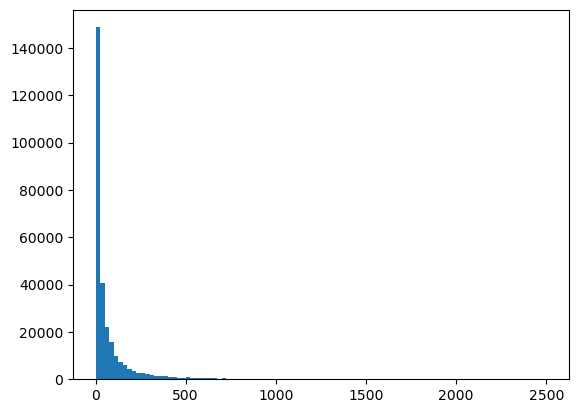

In [65]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

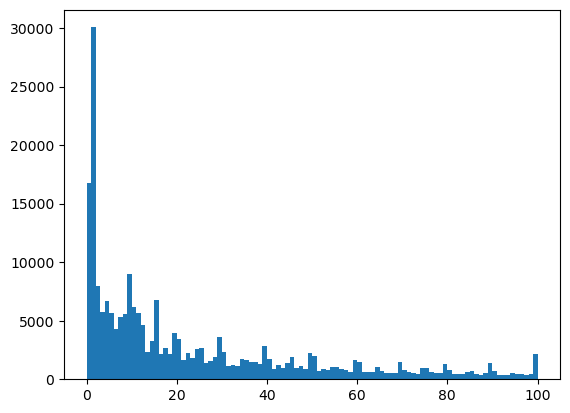

In [66]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


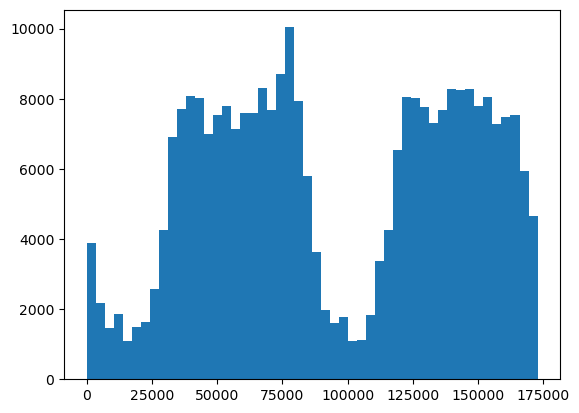

F


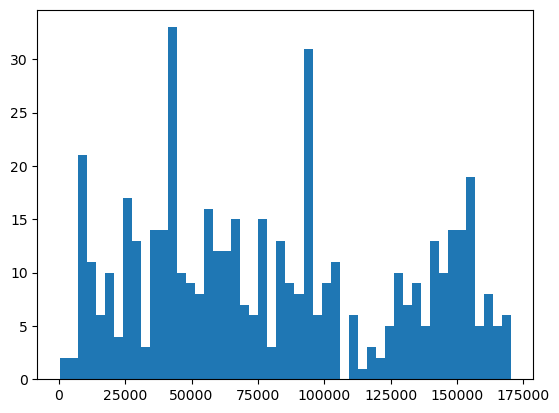

V1
NF


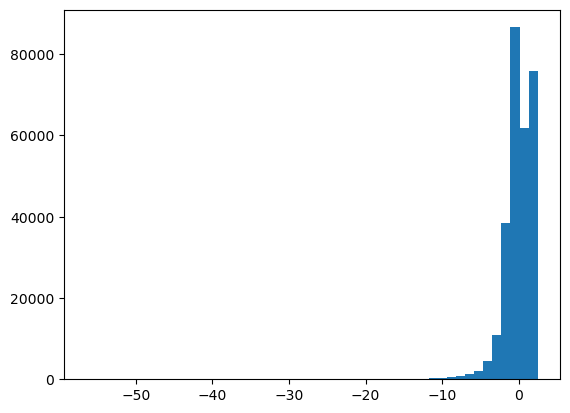

F


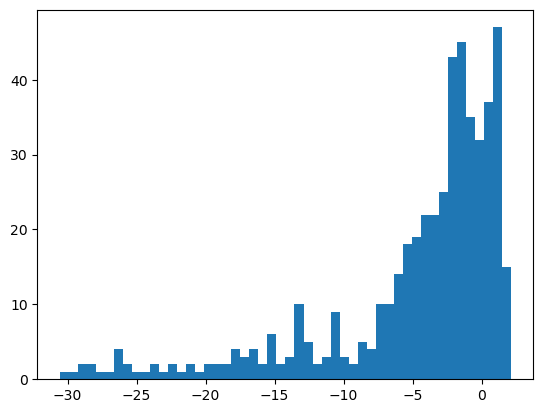

V2
NF


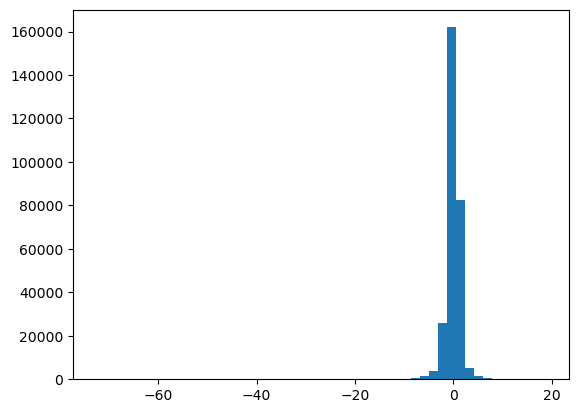

F


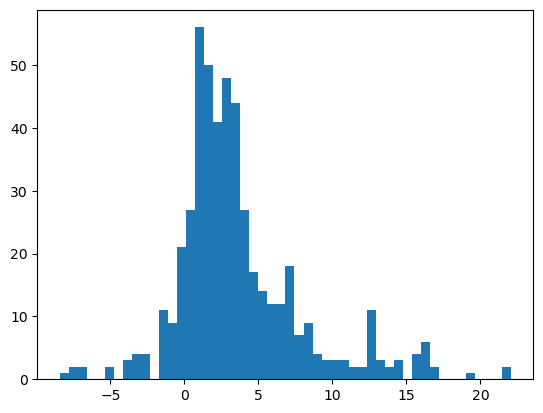

V3
NF


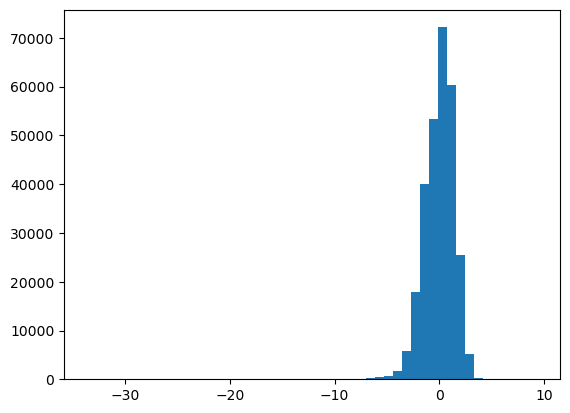

F


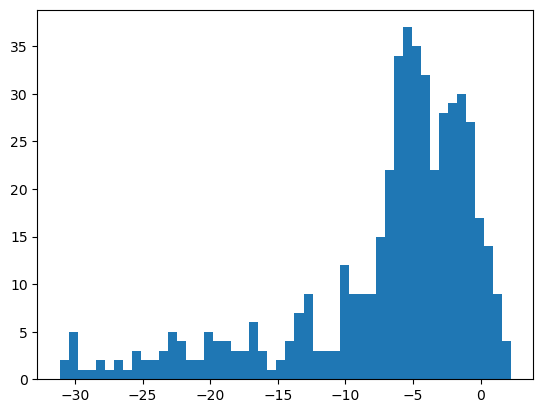

V4
NF


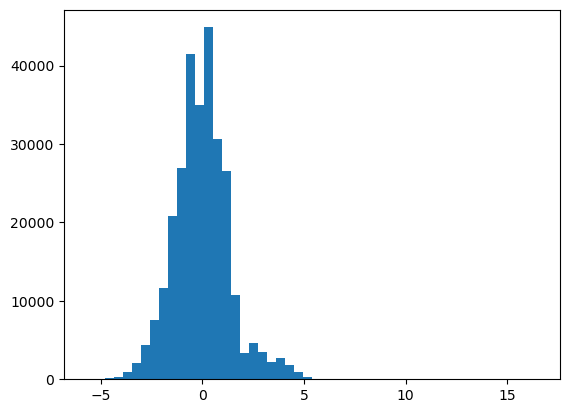

F


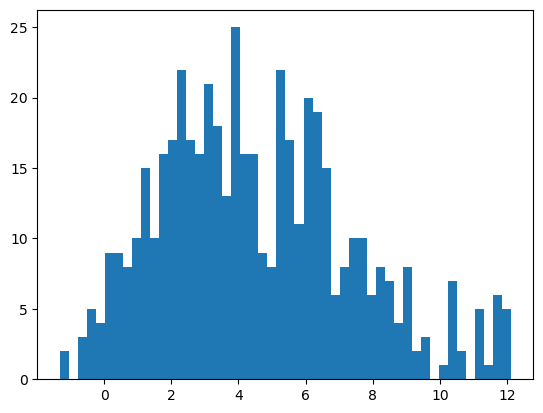

V5
NF


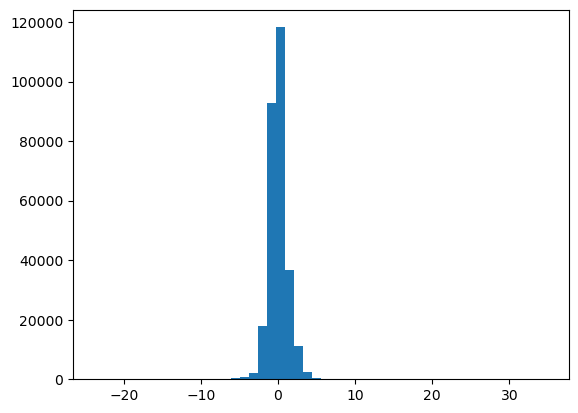

F


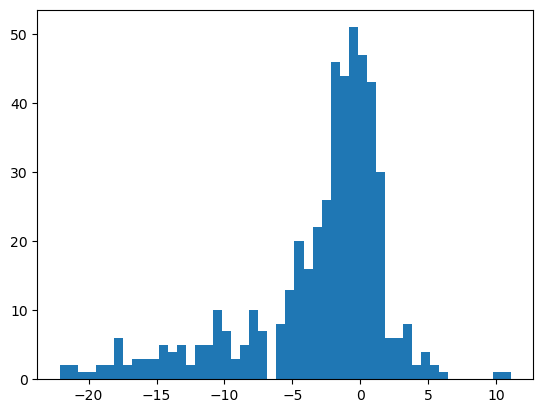

V6
NF


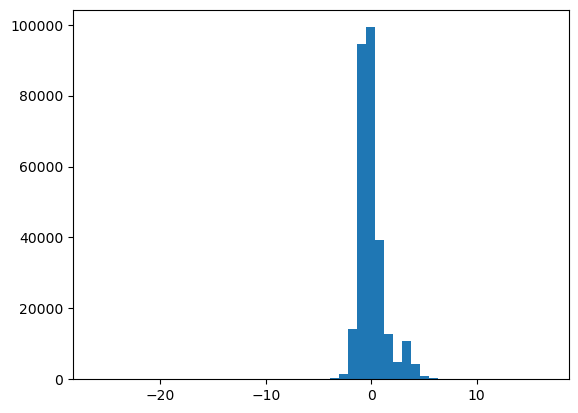

F


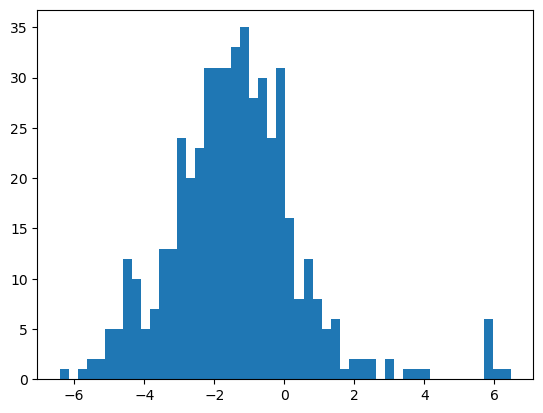

V7
NF


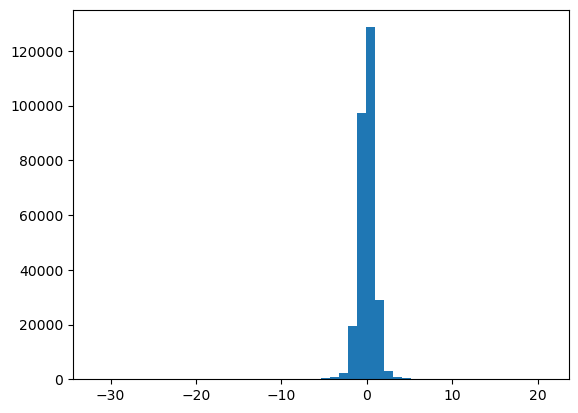

F


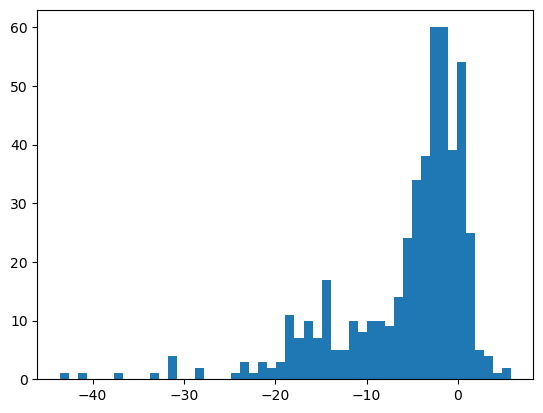

V8
NF


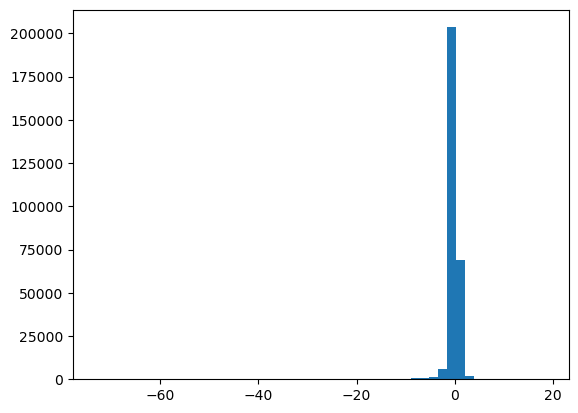

F


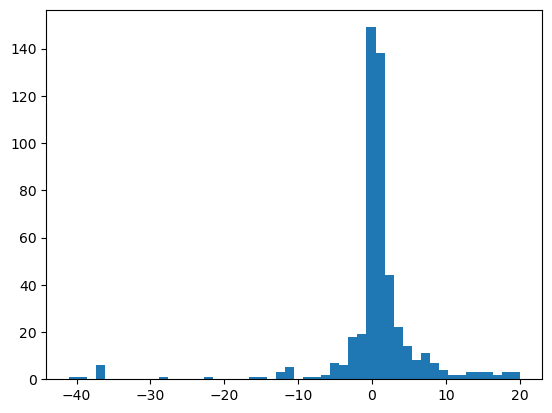

V9
NF


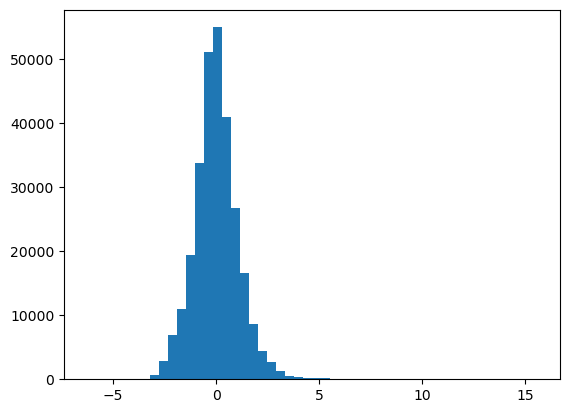

F


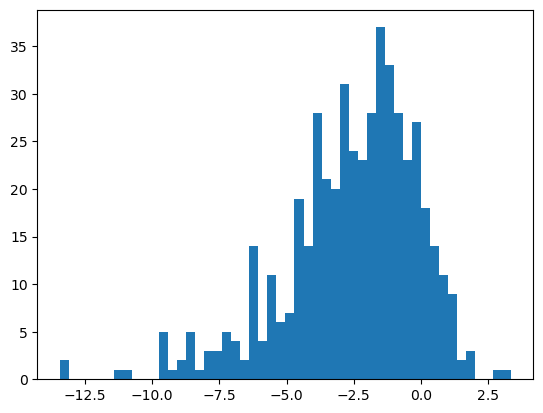

V10
NF


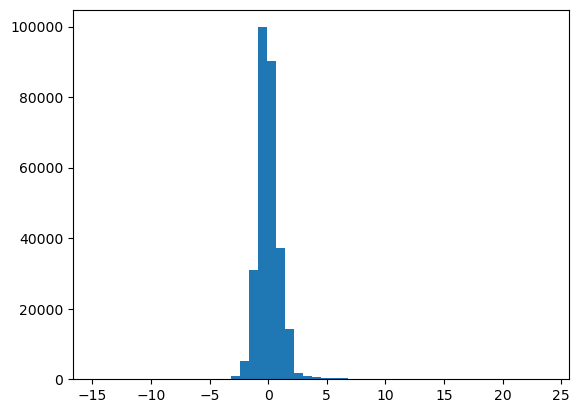

F


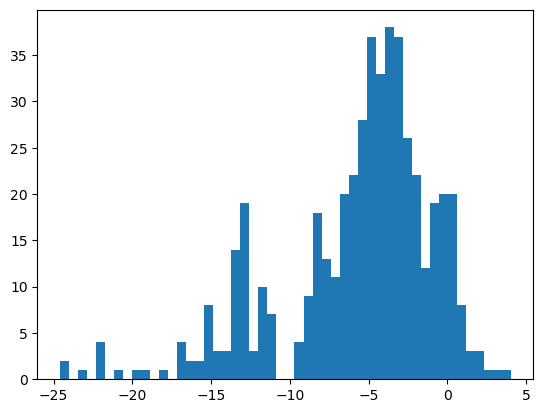

V11
NF


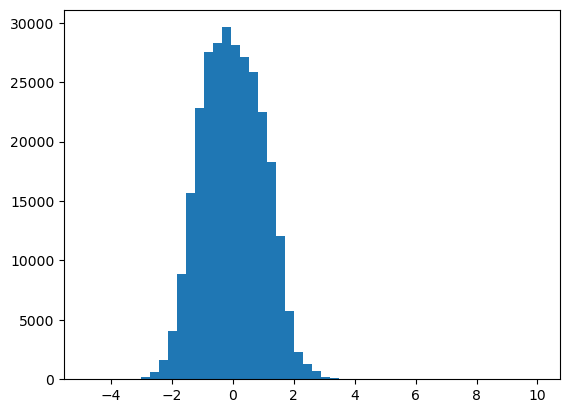

F


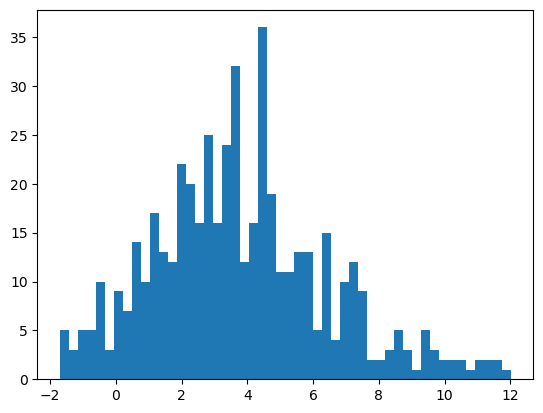

V12
NF


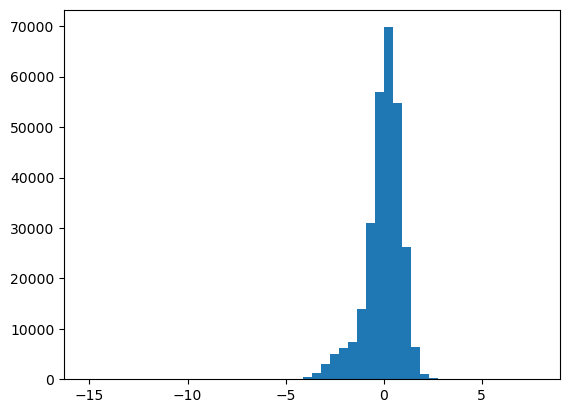

F


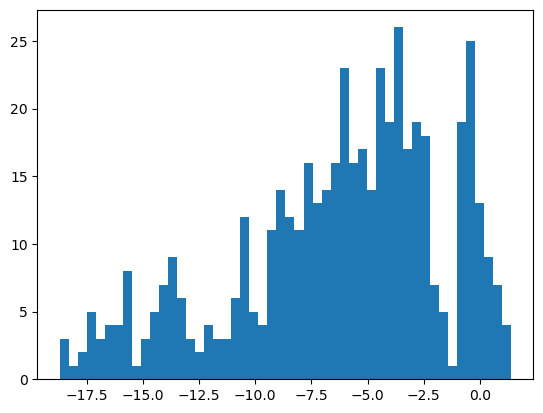

V13
NF


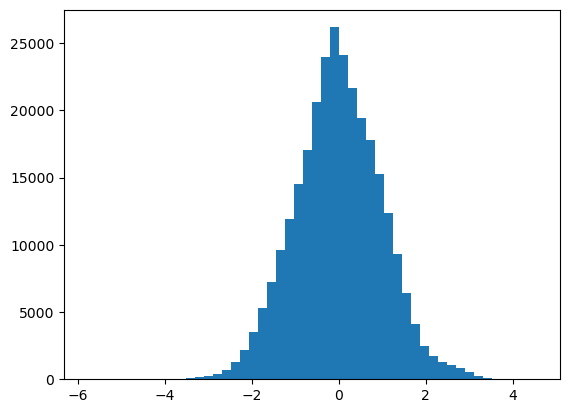

F


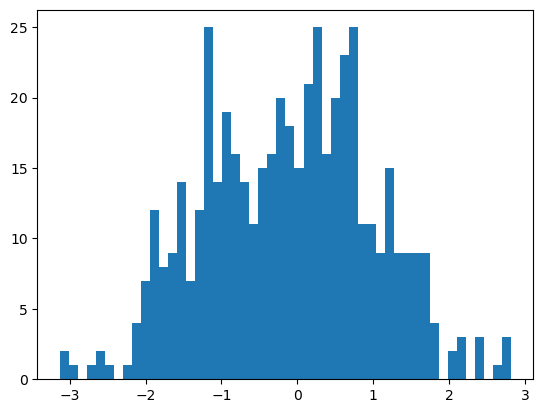

V14
NF


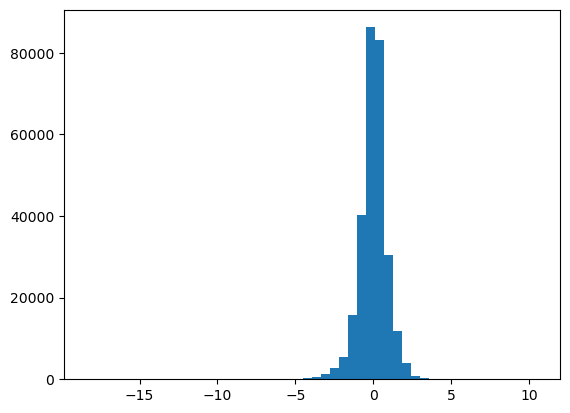

F


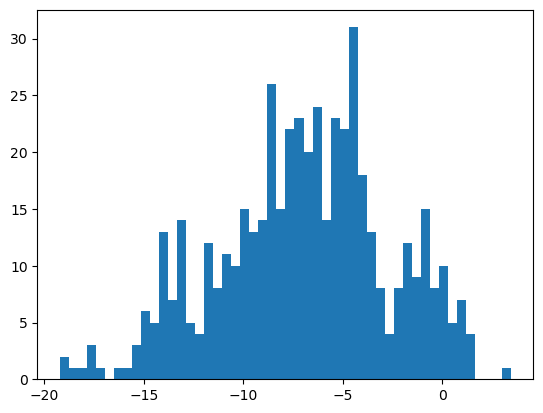

V15
NF


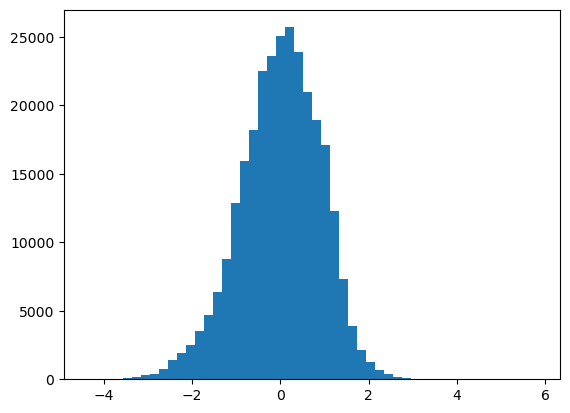

F


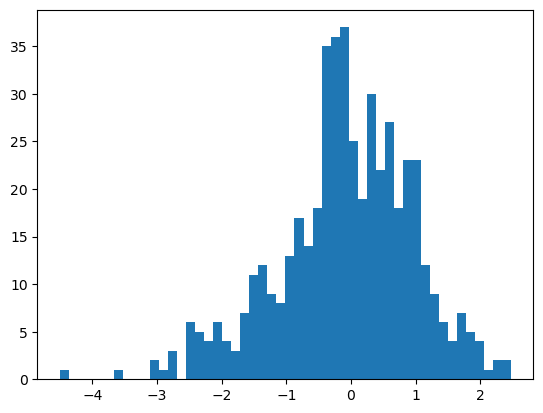

V16
NF


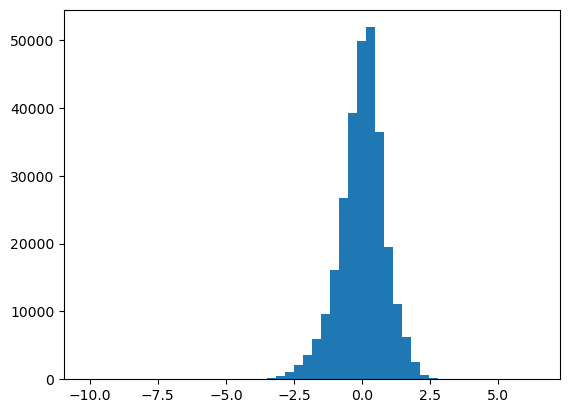

F


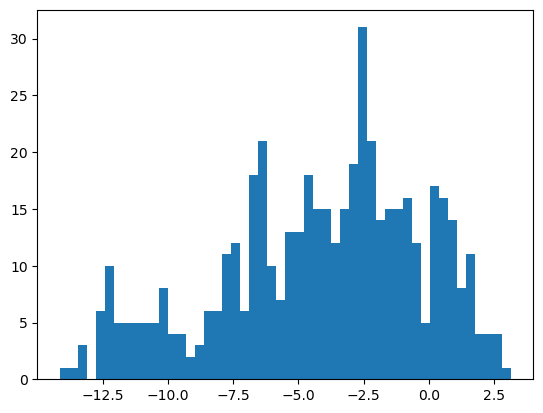

V17
NF


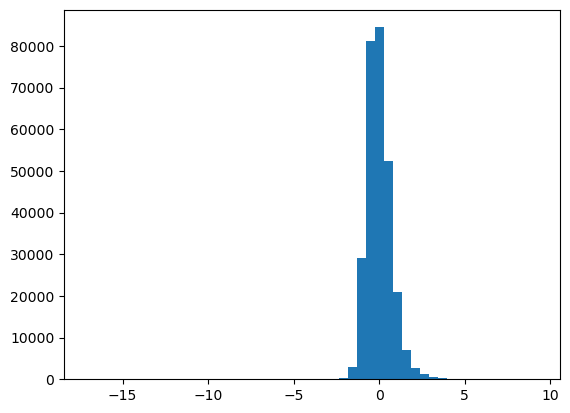

F


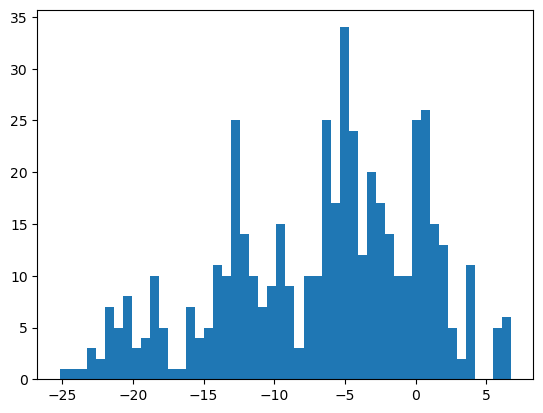

V18
NF


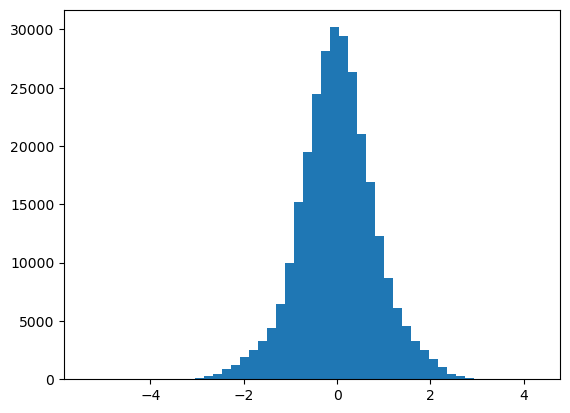

F


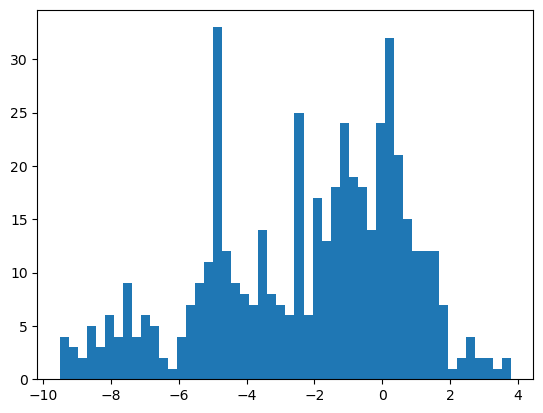

V19
NF


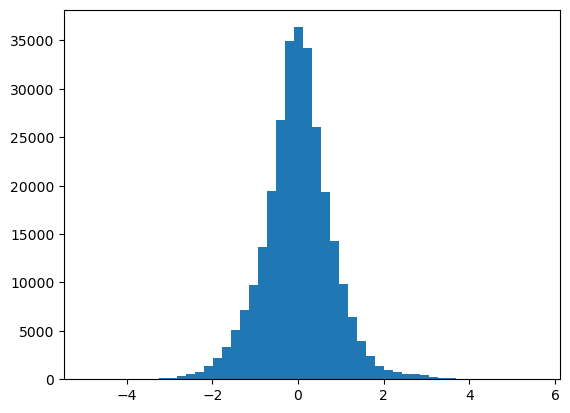

F


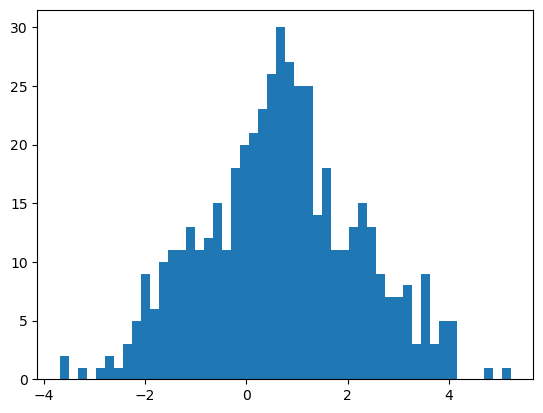

V20
NF


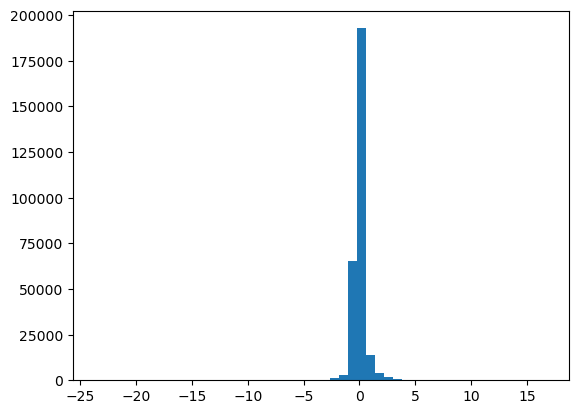

F


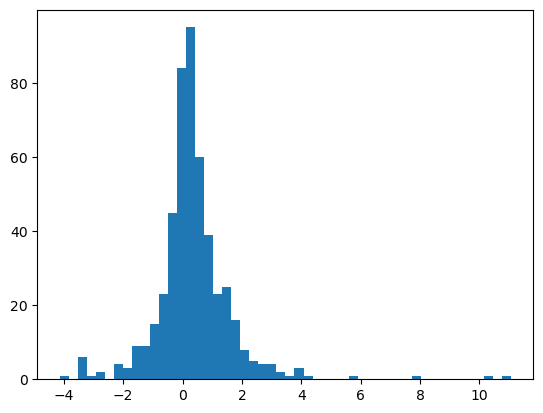

V21
NF


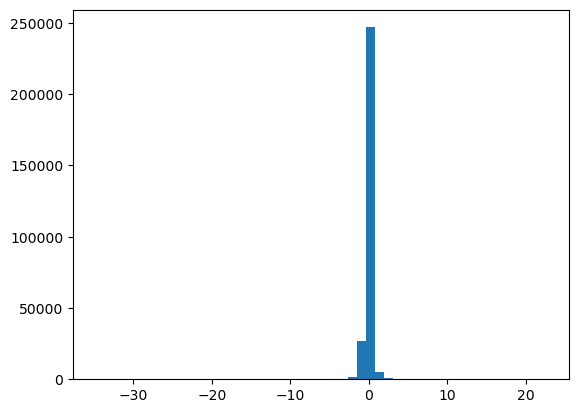

F


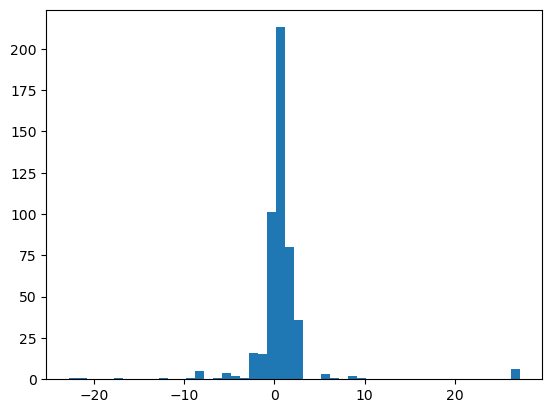

V22
NF


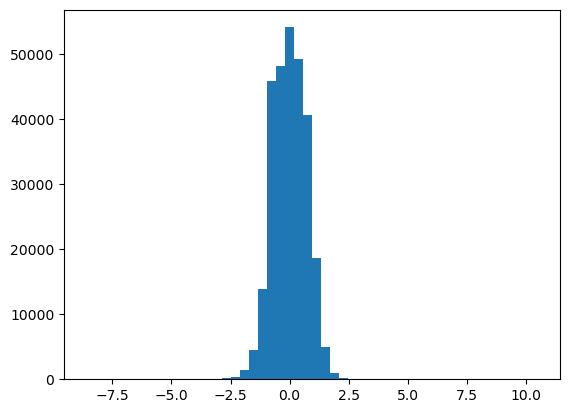

F


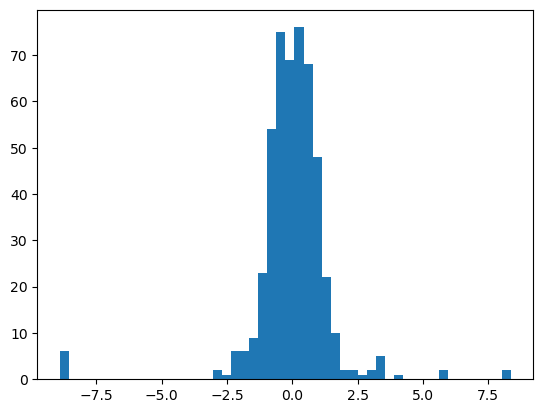

V23
NF


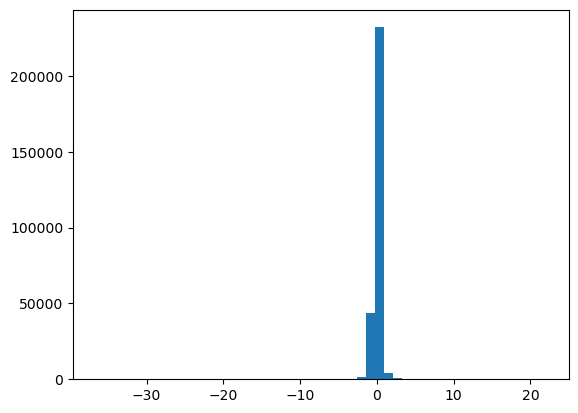

F


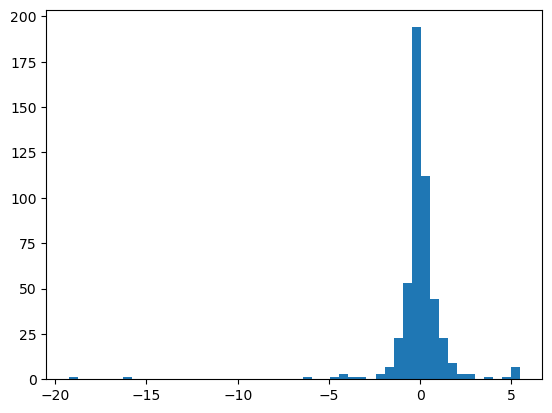

V24
NF


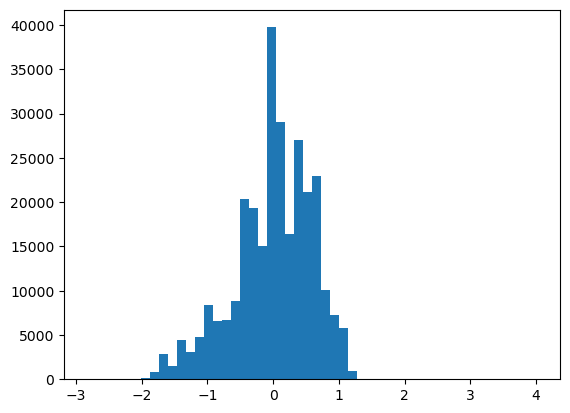

F


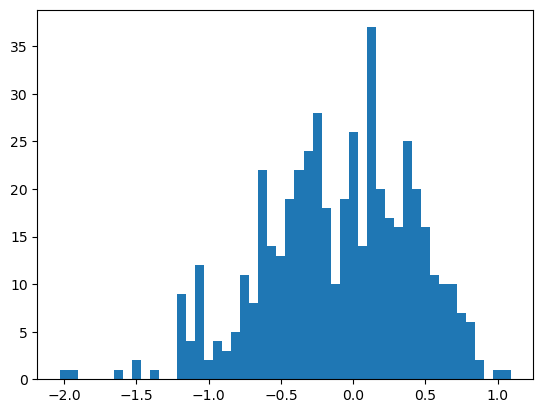

V25
NF


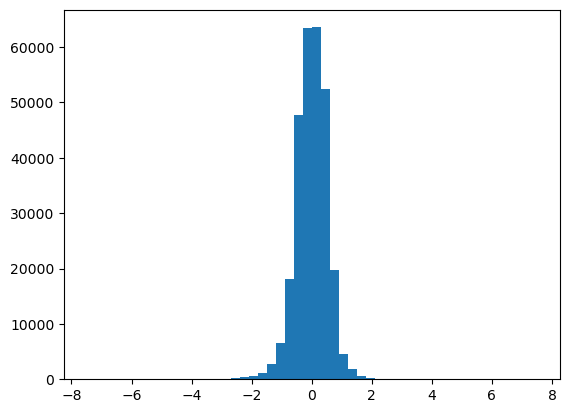

F


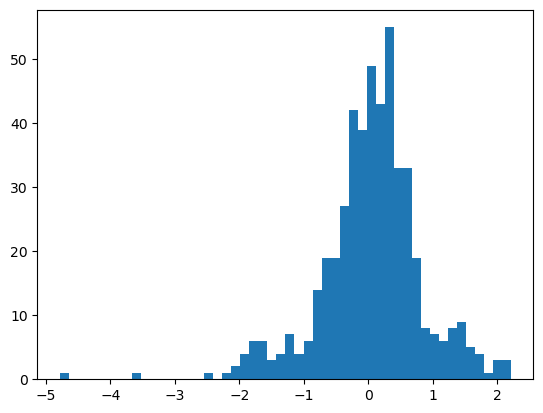

V26
NF


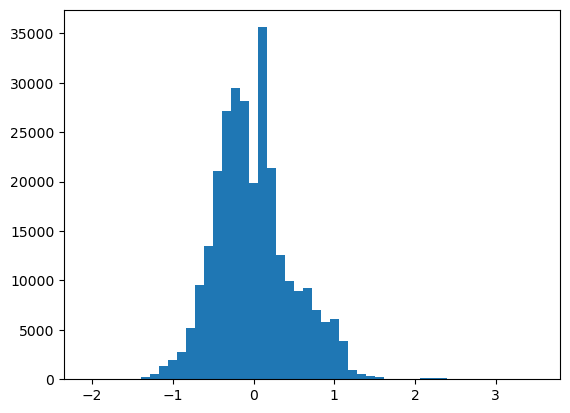

F


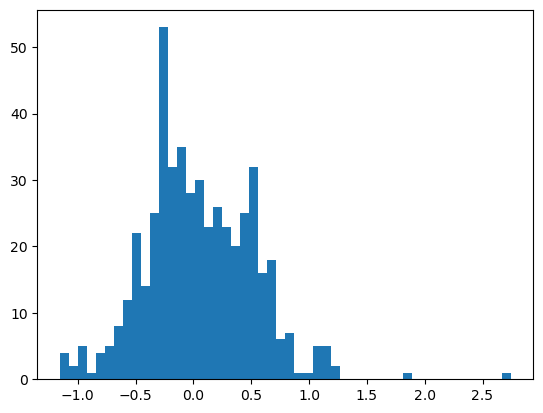

V27
NF


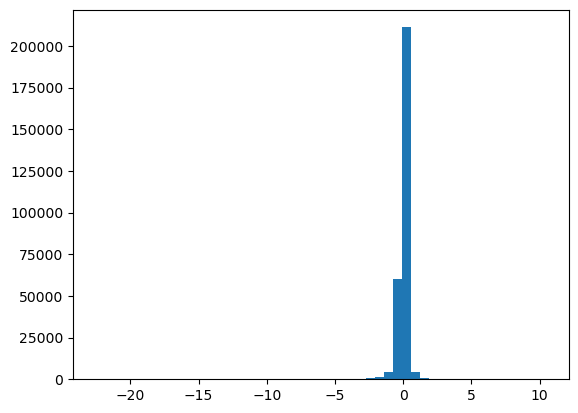

F


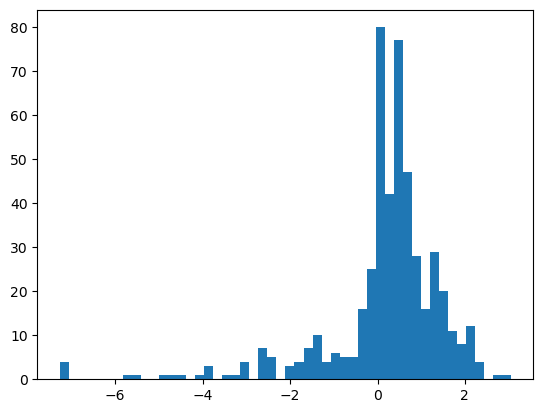

V28
NF


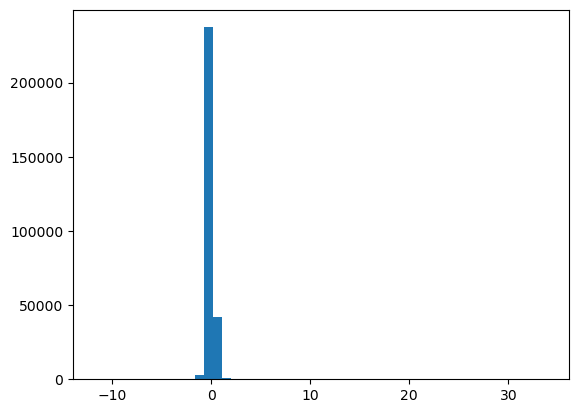

F


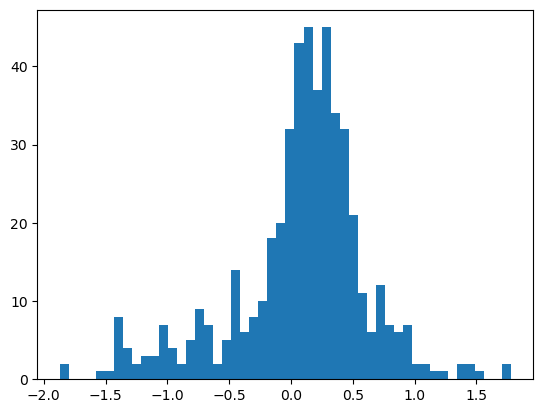

Amount
NF


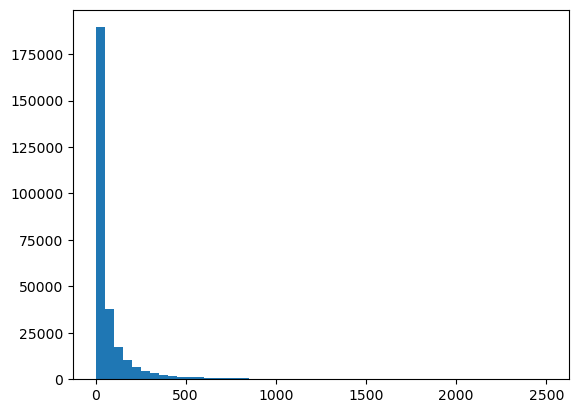

F


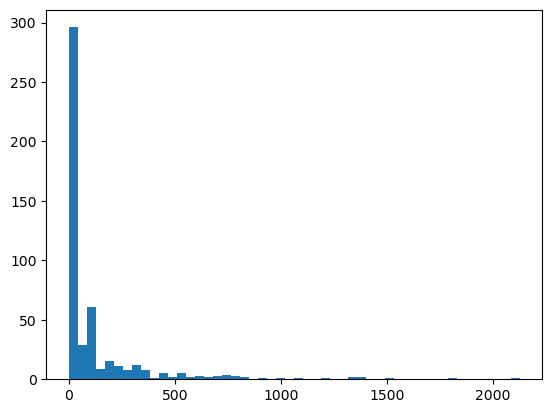

Class
NF


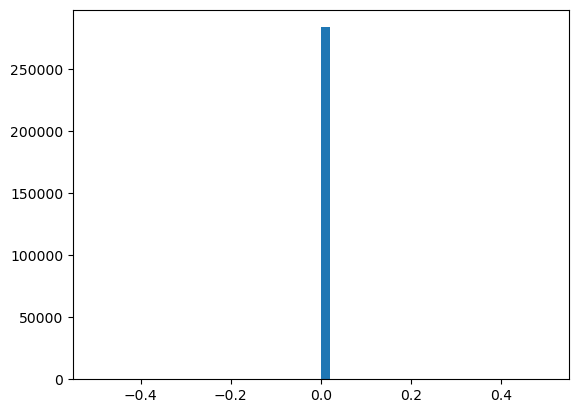

F


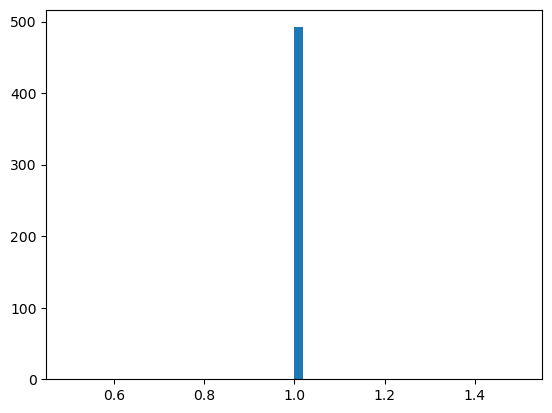

In [67]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [68]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [69]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [70]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [71]:
fin_df = grouped_amountlow_df[selected_col]

In [72]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [73]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [74]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
43387    41487.0  1.086829  0.201741 -0.757938  0.201582  0.180085 -1.026241   
46018    42606.0  0.593730 -2.311744 -0.549637 -1.016688 -1.457791 -0.672791   
21039    31427.0 -1.423757 -0.747557  0.815489 -2.984199 -0.530513 -1.541140   
138661   82781.0 -0.711273  1.272483  1.681631  0.039897 -0.312381 -1.161083   
195890  131265.0  2.173883 -1.097276 -0.800018 -1.223541 -0.634407  0.414585   

              V7        V8        V9       V10       V11       V12       V13  \
43387   0.489852 -0.215570 -0.412914 -0.664076  1.750615  0.754638  0.239528   
46018   0.076013 -0.367918 -2.252139  1.190847 -0.146036 -0.695355  0.508681   
21039   1.410711 -0.538227 -0.841008 -1.003384 -0.307091  0.307346  0.704677   
138661  0.853875 -0.173979 -0.438558 -0.053805  0.321036  0.814690  1.226450   
195890 -1.307719  0.206074 -0.020351  0.938436  0.204618 -0.371247 -0.076043   

             V14       V15       V16       V17       V18       V19       V20  \
43387  -0.931521  0.302758  0.806050  0.589787  0.295107  0.431149  0.196154   
46018   0.079298  0.603256 -0.889862  0.942640 -0.922181 -0.476473  0.589434   
21039   0.135669  0.709915 -2.061923 -0.024044  0.718854 -0.245857 -0.344968   
138661 -0.152389  0.687480 -0.030825 -0.284477 -0.696867 -0.227419  0.298008   
195890 -0.245912  0.072534  1.793367 -0.501539 -0.200694  0.807798  0.009917   

             V27       V28  Amount  Class  
43387  -0.089974  0.041849  101.68      0  
46018  -0.069058  0.094297  484.98      0  
21039  -0.071748  0.121767  231.00      0  
138661  0.384295  0.192762   21.87      0  
195890  0.006607 -0.057120   12.00      0

In [75]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [76]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [77]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [78]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [79]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [80]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [81]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    87736.331228      -2.635702       2.004376      -3.836373   
std     48456.733926       5.658687       3.696156       6.406075   
min         0.000000     -46.855047     -47.429676     -33.680984   
25%     45818.866453      -3.232585      -0.083297      -5.280195   
50%     79940.000000      -0.875381       1.020717      -1.614925   
75%    134974.017649       0.788511       3.044167       0.251721   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.348480      -1.774176      -0.772797      -3.080957   
std         3.176468       4.318971       1.692863       5.882009   
min        -5.600607     -23.669726     -23.496714     -43.557242   
25%        -0.072677      -1.899709      -1.635580      -3.460536   
50%         1.438583      -0.478561      -0.724029      -0.768440   
75%         4.434922       0.411894       0.002277       0.168764   
max        13.129143      34.099309      13.582056      21.014587   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.456420      -1.394399      -3.032456       1.976953   
std         4.776484       2.287924       4.584249       2.725050   
min       -50.943369     -13.434066     -24.588262      -4.797473   
25%        -0.180239      -2.420248      -4.769426      -0.095507   
50%         0.186374      -0.851275      -1.078348       1.255151   
75%         0.916394       0.066428      -0.042218       3.634608   
max        20.007208      15.594995      23.745136      12.018913   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.269194      -0.051051      -3.622166      -0.042610   
std         4.602942       0.982401       4.586508       0.918133   
min       -18.683715      -3.961758     -19.214325      -4.498945   
25%        -5.658358      -0.726585      -6.848442      -0.546176   
50%        -1.214135      -0.036334      -1.361296      -0.002272   
75%         0.168947       0.620094       0.073442       0.591929   
max         4.846452       4.569009       7.692209       5.825654   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.176032      -3.551793      -1.209275       0.361023   
std         3.427422       5.854620       2.356104       1.182960   
min       -14.129855     -24.019099      -9.498746      -4.932733   
25%        -3.656861      -5.648444      -1.925716      -0.366926   
50%        -0.781636      -0.660310      -0.442515       0.242334   
75%         0.213286       0.131198       0.281028       0.971354   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.198651       0.058770       0.036473      95.268884  
std         1.019321       1.004252       0.411445     188.861870  
min       -23.646890     -22.565679     -11.710896       0.000000  
25%        -0.185829      -0.069623      -0.058296       3.690000  
50%         0.045476       0.056285       0.035796      27.340430  
75%         0.454412       0.437008       0.209695      99.990000  
max        13.530721      10.507884      22.620072    2500.000000

In [82]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

After performing EDA, we found  certain feautures that are more important by observing some outliers which are fruad

# Logistic Regression

In [83]:


def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }
    
    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    
    # Define the scoring function
    scoring = make_scorer(f1_score)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))
    
    # Perform the grid search with the training data
    grid_search.fit(X_train, y_train)
    
    # Return the best model
    return grid_search.best_estimator_

# Example usage:
# best_model = tune_logistic_regression(X_train, y_train)
# print("Best model parameters:", best_model.get_params())


In [86]:
from sklearn.model_selection import StratifiedKFold


In [87]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }

    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)

    # Define the scoring function
    scoring = make_scorer(f1_score)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))

    # Fit the model
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_

# Assuming X_train_smote and y_train_smote are defined
model1 = tune_logistic_regression(X_train_smote, y_train_smote)


In [84]:
def tune_logistic_regression(X_train, y_train):
    # Define the hyperparameters and their respective ranges to be tested
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Norm used in the penalization
        'solver': ['liblinear']                # Algorithm to use for optimization
    }
    
    # Create a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    
    # Define the scoring function
    scoring = make_scorer(f1_score)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))

In [88]:
model1= tune_logistic_regression(X_train_smote, y_train_smote)

In [89]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=10000)

In [90]:
print("X_train_smote shape: ", X_train_smote.shape)
print("y_train_smote shape: ", y_train_smote.shape)



X_train_smote shape:  (425812, 24)
y_train_smote shape:  (425812,)


In [91]:
log_reg = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear']               
}
scoring = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_smote, y_train_smote)
print("Grid search completed.")
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Grid search completed.
Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score:  0.980436281237583
Best estimator:  LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear')


In [92]:
model1.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [93]:
predictions = model1.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.15      0.87      0.26       123

    accuracy                           0.99     71092
   macro avg       0.57      0.93      0.63     71092
weighted avg       1.00      0.99      0.99     71092



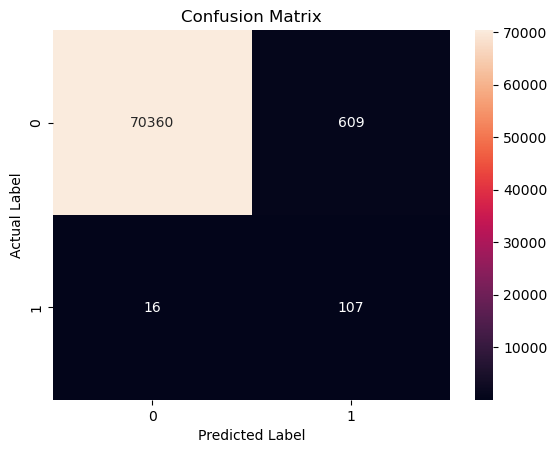

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.15      0.87      0.26       123

    accuracy                           0.99     71092
   macro avg       0.57      0.93      0.63     71092
weighted avg       1.00      0.99      0.99     71092

AUROC Score: 0.9848977917416593


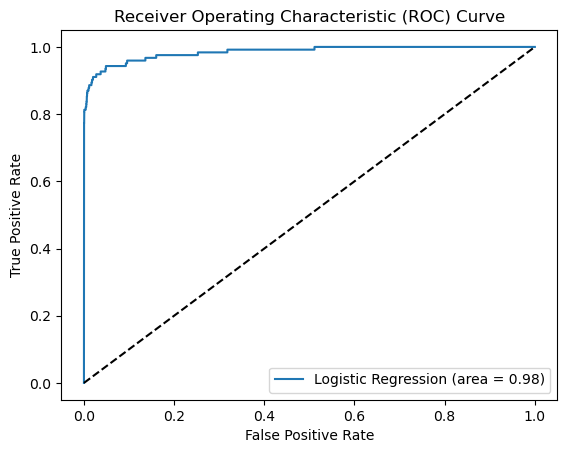

In [94]:

# Predictions
predictions = model1.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model1.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#In logistic regression we have done hyper parameter tunning to get 98% accuracy in ROC curve 

# Decision Tree

In [95]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=30, random_state=0)

# Fit the model to the training data
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(min_samples_leaf=30, random_state=0)

Here we have set a hyperparameterr of decision tree which is the minimum sample leaf =30 in order to avoid overfitting 

In [96]:
predictions1 = clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.15      0.87      0.26       123

    accuracy                           0.99     71092
   macro avg       0.57      0.93      0.63     71092
weighted avg       1.00      0.99      0.99     71092



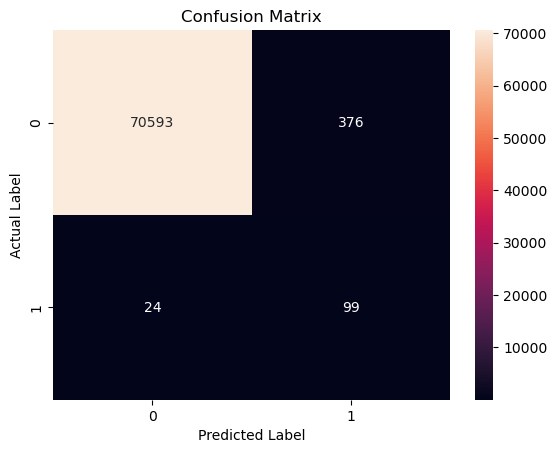

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70969
           1       0.15      0.87      0.26       123

    accuracy                           0.99     71092
   macro avg       0.57      0.93      0.63     71092
weighted avg       1.00      0.99      0.99     71092

AUROC Score: 0.9209503130131135


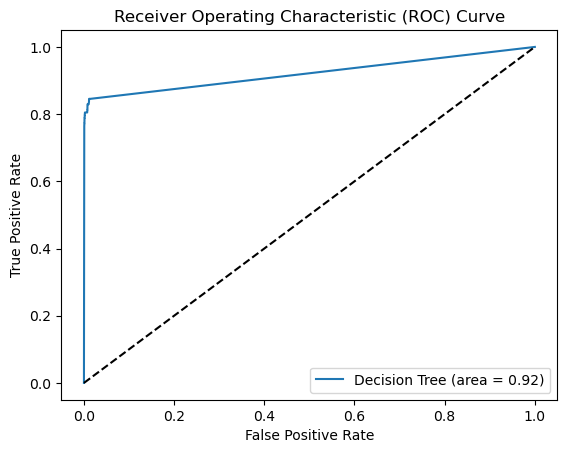

In [97]:



# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions1)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob =clf.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In decision tree we have selected the proper hyper parameters as minimum number of samples at leaf node =30 and we can observe 95% accuracy 

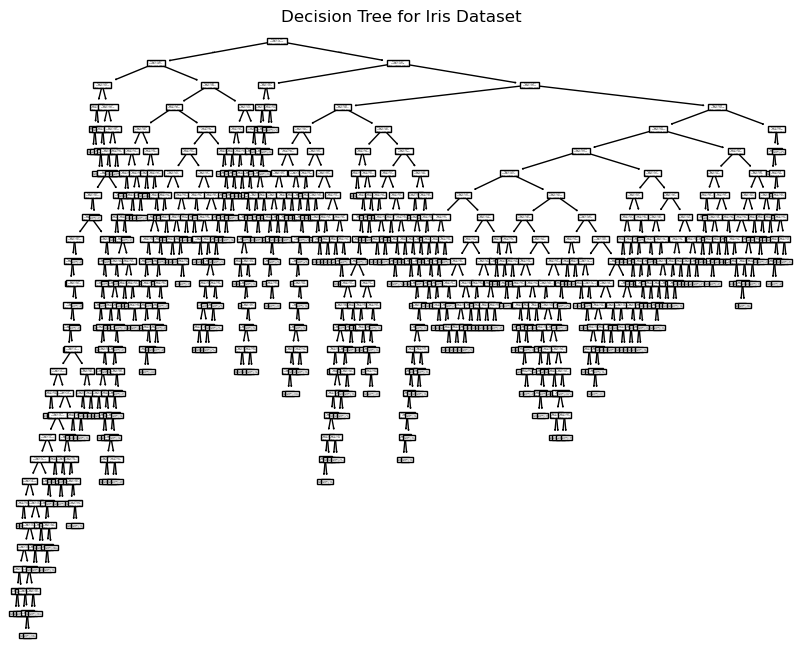

In [98]:

from sklearn.tree import DecisionTreeClassifier, plot_tree


# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf)
plt.title("Decision Tree for Iris Dataset")
plt.show()


# Random Forest

In [99]:
rf_clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=30,  # Set a finite max depth for each tree
    min_samples_leaf=30,  # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=30, min_samples_leaf=30, random_state=42)

In [100]:
predictions = rf_clf.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.65      0.82      0.72       123

    accuracy                           1.00     71092
   macro avg       0.82      0.91      0.86     71092
weighted avg       1.00      1.00      1.00     71092



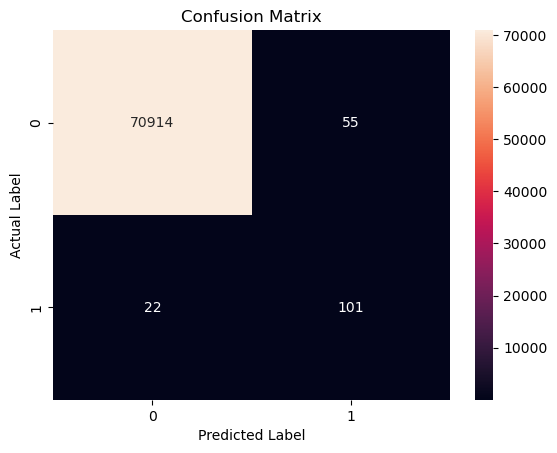

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70969
           1       0.65      0.82      0.72       123

    accuracy                           1.00     71092
   macro avg       0.82      0.91      0.86     71092
weighted avg       1.00      1.00      1.00     71092

AUROC Score: 0.9885984800188151


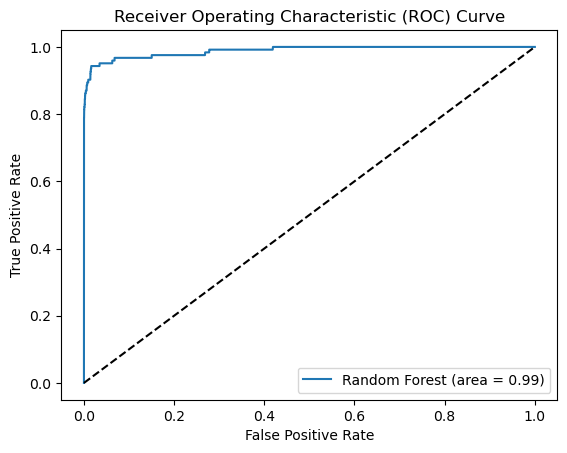

In [101]:
# Predictions
predictions = rf_clf.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = rf_clf.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In Random forest we have set proper hyper parameters as maximum depth = 30 and minimum sample at leaf =30 and we can observe accuracy rate is 99 % in ROC curve

#Conclusion

1.Random  Forest works as the best model for this data set.

2.We have got 99% accuracy in ROC curve  in Random Forest model. 

3.We can observe 98% accuracy in Logistic Regression which is better than previous result because the better outcome is caused by hyperparameter tunning in logistic Regression.

4.We also got  the accruacy rate of 95% in Decision Tree which is better indeed as hyperparameters setting being  administered ( Maximum depth =30 , Minimun number of samples at leaf node =30).

5.Frauds were not of high values in comparison to the normal transactions.

6.Maximum amount of fraud transaction was 2500-3000 in the native currency as per EDA.

7.There can be seen a rise in the Fraud transactions during the morning or early morning time period as it shows the  bimodal distribution.
